In [17]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

In [18]:
path_humano = "./anotaciones_corrupcion_modificado.csv"
df_humano = pd.read_csv(path_humano, header=0)

path_llama = "./respuestas_formulario_modificado/incisos.csv"
df_llama = pd.read_csv(path_llama, header=0, sep=';')
df_llama.drop(columns=['version'], inplace=True)

In [19]:
incisos_tipo = {"a)": "a) ONG (Organización No Gubernamental) o de la sociedad civil.",
                "b)": "b) Gobierno.",
                "c)": "c) Organismo internacional.",
                "d)": "d) Prensa tradicional.",
                "e)": "e) Agencia digital de noticias.",
                "f)": "f) Empresas.",
                "g)": "g) Plataformas educativas.",
                "h)": "h) Academia.",
                "i)": "i) Blogs."
                }

incisos_origen = {"a)": "a) Nacional",
                  "b)": "b) Internacional"}

incisos_proposito = {"a)": "a) Denunciar un caso específico",
                    "b)": "b) Reportar o comentar una situación",
                    "c)": "c) Mostrar estadísticas del problema",
                    "d)": "d) Educar sobre el tema",
                    "e)": "e) Exponer una opinión",
                    "f)": "f) Propaganda política",
                    "g)": "g) Alertar sobre una situación general",
                    "h)": "h) Guía o información para realizar el proceso de denuncia de un caso de corrupción",
                    "i)": "i) Página para registrar de una denuncia o un aviso de un caso de corrupción"
                    }

incisos_informacion = {"a)": "a) Factual",
                       "b)": "b) Subjetiva",
                       "c)": "c) Emocional"
                       }

incisos_vision = {"a)": "a) Problema sistémico.",
                  "b)": "b) Delitos/casos/personas particulares",
                  "c)": "c) No aplica"
                  }

incisos_consecuencias = {"a)": "a) Penas y sanciones legales",
                         "b)": "b) Consecuencias no legales como castigo social o pérdida de estatus",
                         "c)": "c) Impunidad (falta de sanciones) de los actos de corrupción",
                         "d)": "d) No aplica"
                         }

incisos_que_muestra = {"a)": "a) Propuestas de solución a la corrupción",
                       "b)": "b) Problemas derivados de la corrupción",
                       "c)": "c) Ambos",
                       "d)": "d) Ninguna de las anteriores"
                       }

incisos_intencion = {"a)": "a) Conocer el diagnóstico de la situación de la corrupción",
                     "b)": "b) Tomar conciencia general del problema",
                     "c)": "c) Tomar acciones frente al problema",
                     "d)": "d) Tener esperanza",
                     "e)": "e) Realizar denuncias",
                     "f)": "f) No aplica"
                     }

incisos_localizacion = {"a)": "a) Local",
                        "b)": "b) Nacional",
                        "c)": "c) Regional",
                        "d)": "d) Global",
                        "e)": "e) No aplica"
                        }

incisos_involucrados = {"a)": "a) Gobierno local",
                       "b)": "b) Gobierno nacional",
                       "c)": "c) Empresas",
                       "d)": "d) Ciudadanos concretos",
                       "e)": "e) Empleado público",
                       "f)": "f) Funcionario público",
                       "g)": "g) Tomadores de decisión no gubernamentales",
                       "h)": "h) Organizaciones internacionales o gobiernos extranjeros"
                       }

incisos_formalidad = {"a)": "a) Formal",
                      "b)": "b) Inormal"
                      }

incisos_educacion = {"a)": "a) Básica",
                           "b)": "b) Media",
                           "c)": "c) Superior"
                           }

incisos_tono = {"a)": "a) Positivo",
                "b)": "b) Negativo"
                }

incisos_emociones = {"a)": "a) Alegría",
                    "b)": "b) Tristeza",
                    "c)": "c) Ira",
                    "d)": "d) Miedo",
                    "e)": "e) Sorpresa",
                    "f)": "f) Vergüenza",
                    "g)": "g) Culpa",
                    "h)": "h) Ninguna"
                    }

incisos_dicts = {'tipo_entidad': incisos_tipo,
                 'origen_entidad': incisos_origen,
                 'proposito': incisos_proposito,
                 'informacion_presentada': incisos_informacion,
                 'vision': incisos_vision,
                 'consecuencias': incisos_consecuencias,
                 'que_muestra': incisos_que_muestra,
                 'intencion': incisos_intencion,
                 'localizacion_problema': incisos_localizacion,
                 'involucrados': incisos_involucrados,
                 'formalidad': incisos_formalidad,
                 'nivel_educacion': incisos_educacion,
                 'tono': incisos_tono,
                 'emociones': incisos_emociones}

In [20]:
def extraer_incisos(cadena: str, unico=False):
    """
    Devuelve solo los incisos (a), b), ...) extraídos de la cadena.
    - unico=True: devuelve solo el primer inciso encontrado (o "")
    - unico=False: devuelve todos los incisos separados por espacio
    """
    if not isinstance(cadena, str):
        return ""
    # Busca incisos válidos (ajusta rango [a-i] según tu caso)
    encontrados = re.findall(r'([a-i]\))', cadena.lower())
    if unico:
        return encontrados[0] if encontrados else ""
    else:
        # quitar duplicados preservando orden
        vistos = set()
        unicos = [x for x in encontrados if not (x in vistos or vistos.add(x))]
        return " ".join(unicos)

In [21]:
df_humano.drop(columns=["Marca temporal", "Nombre", "Correo electrónico", "Tiempo aproximado (en minutos) que te tomo revisar el sitio web/texto y contestar todas las preguntas para este sitio web/texto específico:", "Algún comentario adicional que crees que es relevante indicar sobre la página web considerando las preguntas y la temática de corrupción (opcional):\n", "Algún comentario que quieras compartir sobre el cuestionario y la tarea de anotación que estás llevando a cabo (opcional):\n"], inplace=True)
df_humano.rename(columns={"Selecciona una de las 10 páginas a etiquetar": "pagina",
                    "1. Identifica el tipo de entidad que ha publicado el sitio web/texto:": "tipo_entidad",
                    "2. Origen de la entidad que publica el sitio web:": "origen_entidad",
                    '3. Identifica el principal propósito que tiene el contenido del sitio web:': "proposito",
                    '4. El  sitio web/texto principalmente presenta información de forma:': "informacion_presentada",
                    '5. Presenta una visión de la corrupción centrada en:': "vision",
                    '6. Respecto a las consecuencias de la corrupción el  sitio web/texto hace referencia a:': "consecuencias",
                    '7. El  sitio web/texto centra la atención en mostrar:': "que_muestra",
                    '8. Determine cuál es la intención del llamado general hacia el lector:': "intencion",
                    '9. Se presenta la corrupción como como un problema:': "localizacion_problema",
                    '10. Entes involucrados o descritos en el sitio web/texto son:': "involucrados",
                    '11. Respecto al estilo del sitio web/texto, seleccione el nivel de formalidad en el lenguaje:': "formalidad",
                    '12. Estime el nivel de educación necesario para comprender todo el sitio web/texto (o al que parece que se dirigirá el sitio web/texto):': "nivel_educacion",
                    '13. El tono general del sitio web/texto es:': "tono",
                    '14. Apela a alguna de las siguientes emociones:': "emociones"
                    }, inplace=True)

In [22]:
import json
Nombre_Archivo = f"../buscador/resultados/res_unicos_corrupcion.json"

with open(Nombre_Archivo, "r") as file:
    all_hrefs = json.load(file)
all_hrefs

url2idx = {u: i for i, u in enumerate(all_hrefs)}

urls = df_humano["pagina"].unique()
paginas = [url2idx[p.split()[1]] for p in urls]
print(paginas)

df_humano['pagina'] = df_humano['pagina'].apply(lambda x: url2idx[x.split()[1]])
df_llama['pagina'] = df_llama['pagina'].apply(lambda x: url2idx[urls[x-1].split()[1]])

[26, 29, 277, 285, 300, 304, 326, 356, 376, 399]


In [23]:
preguntas = df_humano.columns[1:]
multi_answer = ["proposito", "informacion_presentada", "consecuencias", "intencion", "localizacion_problema", "involucrados", "emociones"]

for p in preguntas:
    df_humano[p] = df_humano[p].apply(extraer_incisos, unico=(p not in multi_answer))
    df_llama[p] = df_llama[p].apply(extraer_incisos, unico=(p not in multi_answer))

In [24]:
num = df_humano['pagina'].astype(str).str.extract(r'^\s*(\d+)')  # captura dígitos al inicio
df_humano['pagina'] = num.fillna(df_humano['pagina']).astype(str)
df_humano['pagina'] = pd.to_numeric(df_humano['pagina'], errors='coerce').astype('Int64')
#df_humano.head()

In [25]:
def calcular_porcentajes(df, pregunta, orden_paginas, posibles_list=None):
    """Devuelve tabla porcentual (páginas × respuestas/incisos)."""
    if posibles_list is None:
        # respuesta única
        tabla = (df.groupby(["pagina", pregunta]).size().unstack(fill_value=0))
        tabla = tabla.reindex(orden_paginas, fill_value=0)
        return tabla.div(tabla.sum(axis=1).replace(0,1), axis=0) * 100
    else:
        # multi-respuesta (incisos separados por espacios)
        posibles_set = set(posibles_list)
        tmp = df[["pagina", pregunta]].copy()
        tmp[pregunta] = tmp[pregunta].fillna("").astype(str).str.strip().str.lower()
        tmp["inciso"] = tmp[pregunta].apply(
            lambda s: list(dict.fromkeys(t for t in s.split() if t in posibles_set))
        )
        den = tmp.groupby("pagina").size().reindex(orden_paginas, fill_value=0)
        expd = tmp.explode("inciso", ignore_index=True)
        expd = expd[expd["inciso"].notna() & (expd["inciso"] != "")]
        counts = expd.groupby(["pagina", "inciso"]).size().unstack(fill_value=0)
        counts = counts.reindex(orden_paginas, columns=posibles_list, fill_value=0)
        return counts.div(den.replace(0,1), axis=0) * 100
    
def conjuntos_activos(porcentajes: pd.DataFrame, umbral: float) -> dict:
    """
    Devuelve {pagina: set(incisos)} con incisos activos por página (>= umbral %).
    porcentajes: DataFrame (index=paginas, columns=incisos) con %.
    """
    activos = {}
    for pag, fila in porcentajes.iterrows():
        incisos = set(fila.index[fila.values >= umbral])
        activos[pag] = incisos
    return activos

def jaccard(act_humano: dict, act_llama: dict, paginas: list) -> pd.Series:
    vals = []
    idx  = []
    for pag in paginas:
        A = act_humano.get(pag, set())
        B = act_llama.get(pag, set())
        union = len(A | B)
        inter = len(A & B)
        score = inter / union if union > 0 else 1.0  # si ambos vacíos, los consideramos iguales (=1)
        vals.append(score); idx.append(pag)
    return pd.Series(vals, index=idx, name="jaccard")

Precisión para tipo_entidad: 0.70


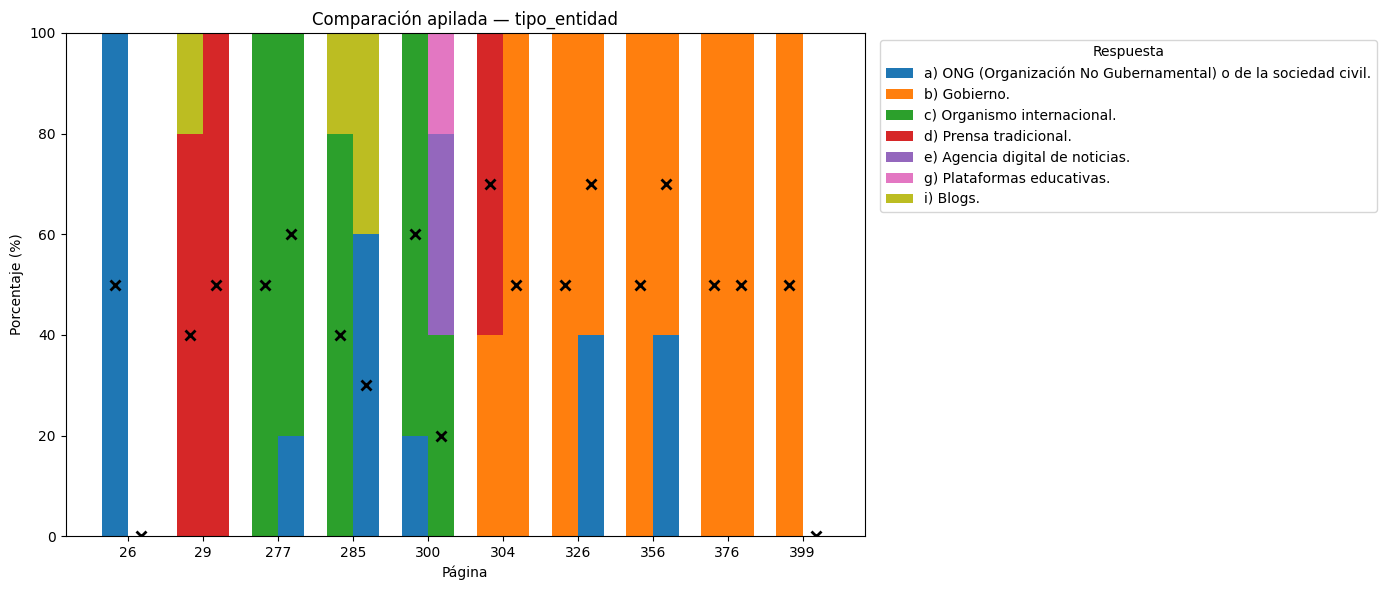

Precisión para origen_entidad: 0.60


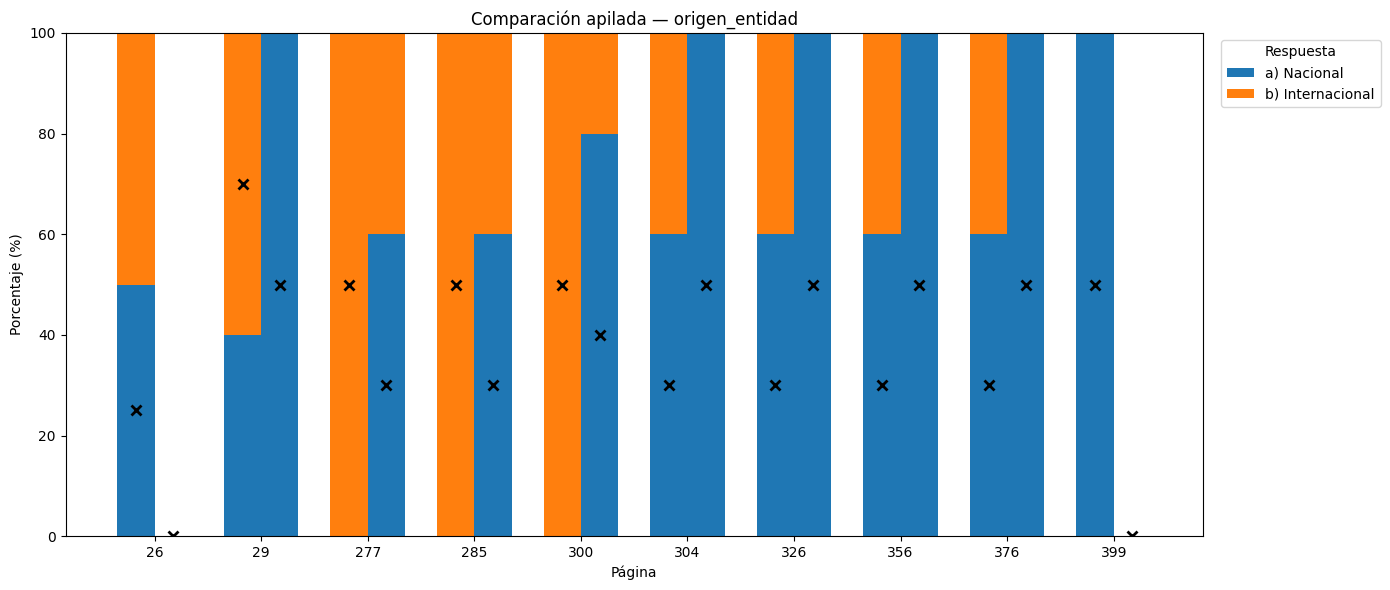

[proposito] Jaccard medio = 0.283


/tmp/ipykernel_7559/550774659.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


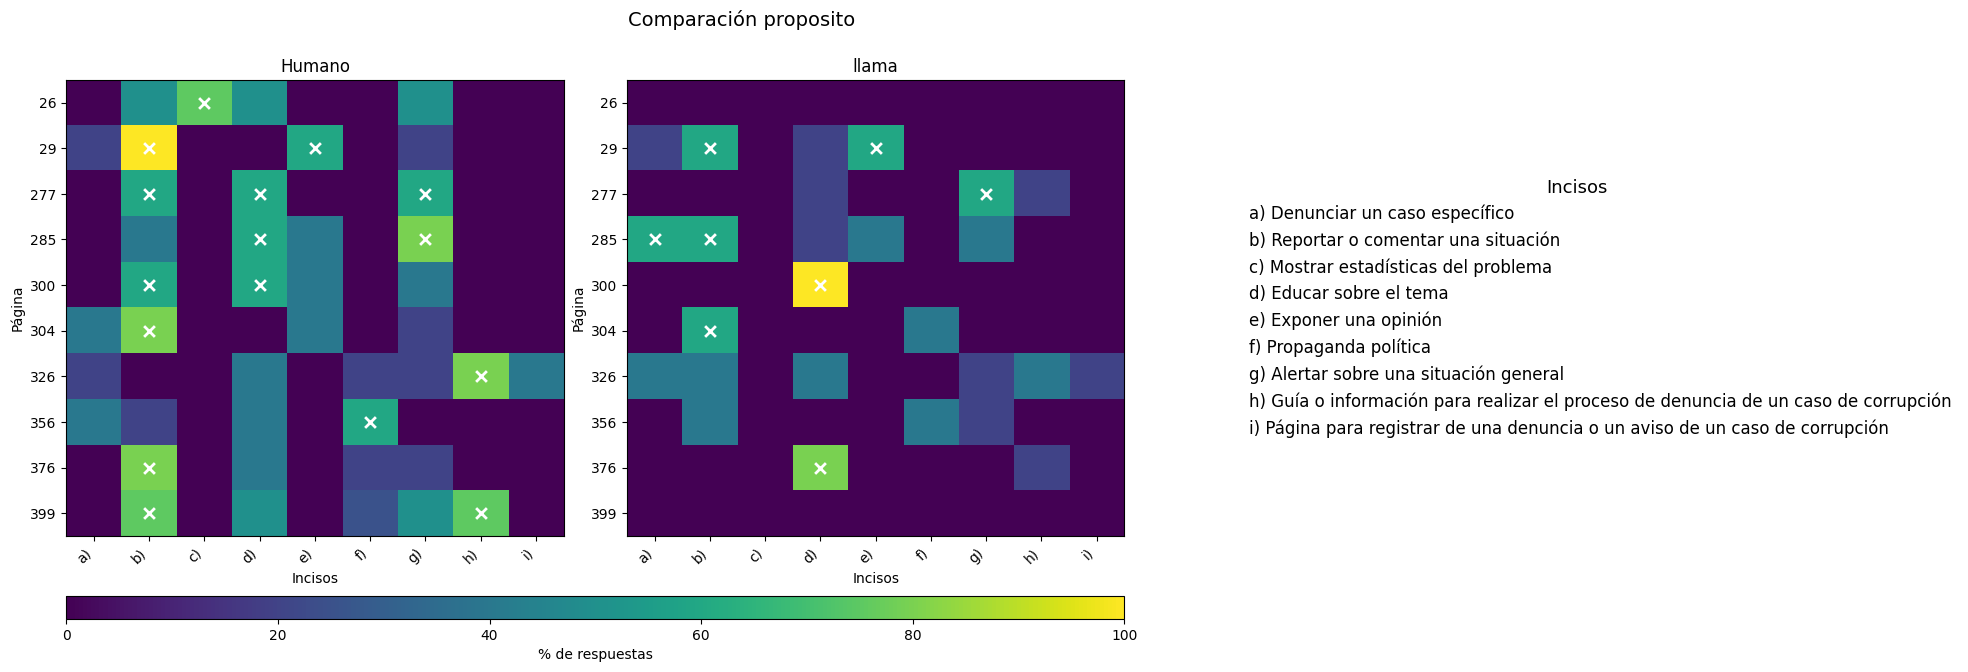

[informacion_presentada] Jaccard medio = 0.600


/tmp/ipykernel_7559/550774659.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


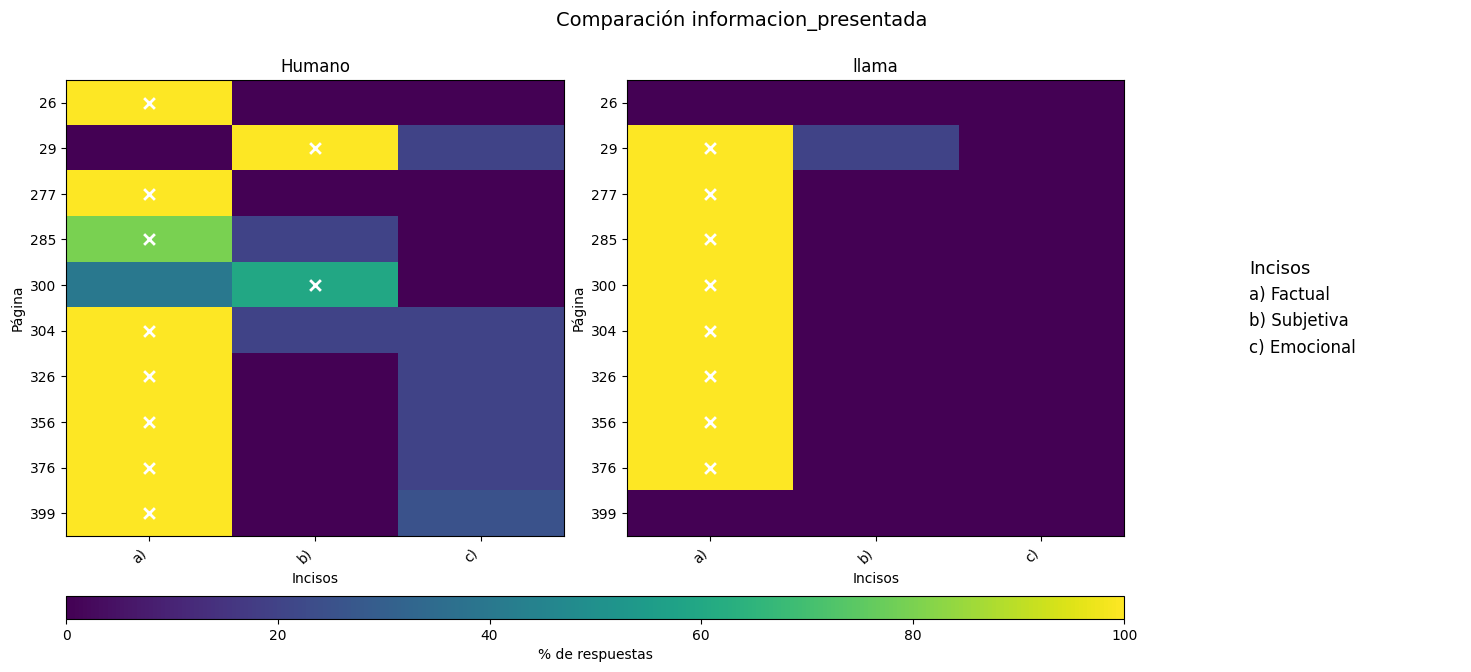

Precisión para vision: 0.70


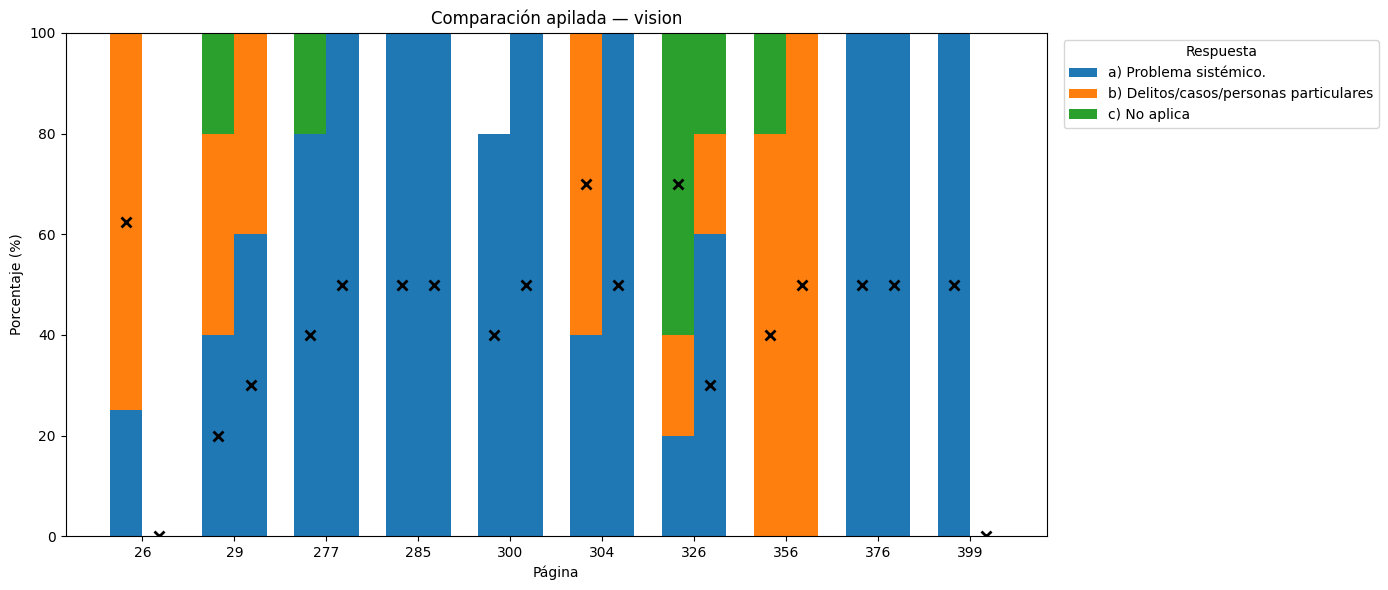

[consecuencias] Jaccard medio = 0.550


/tmp/ipykernel_7559/550774659.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


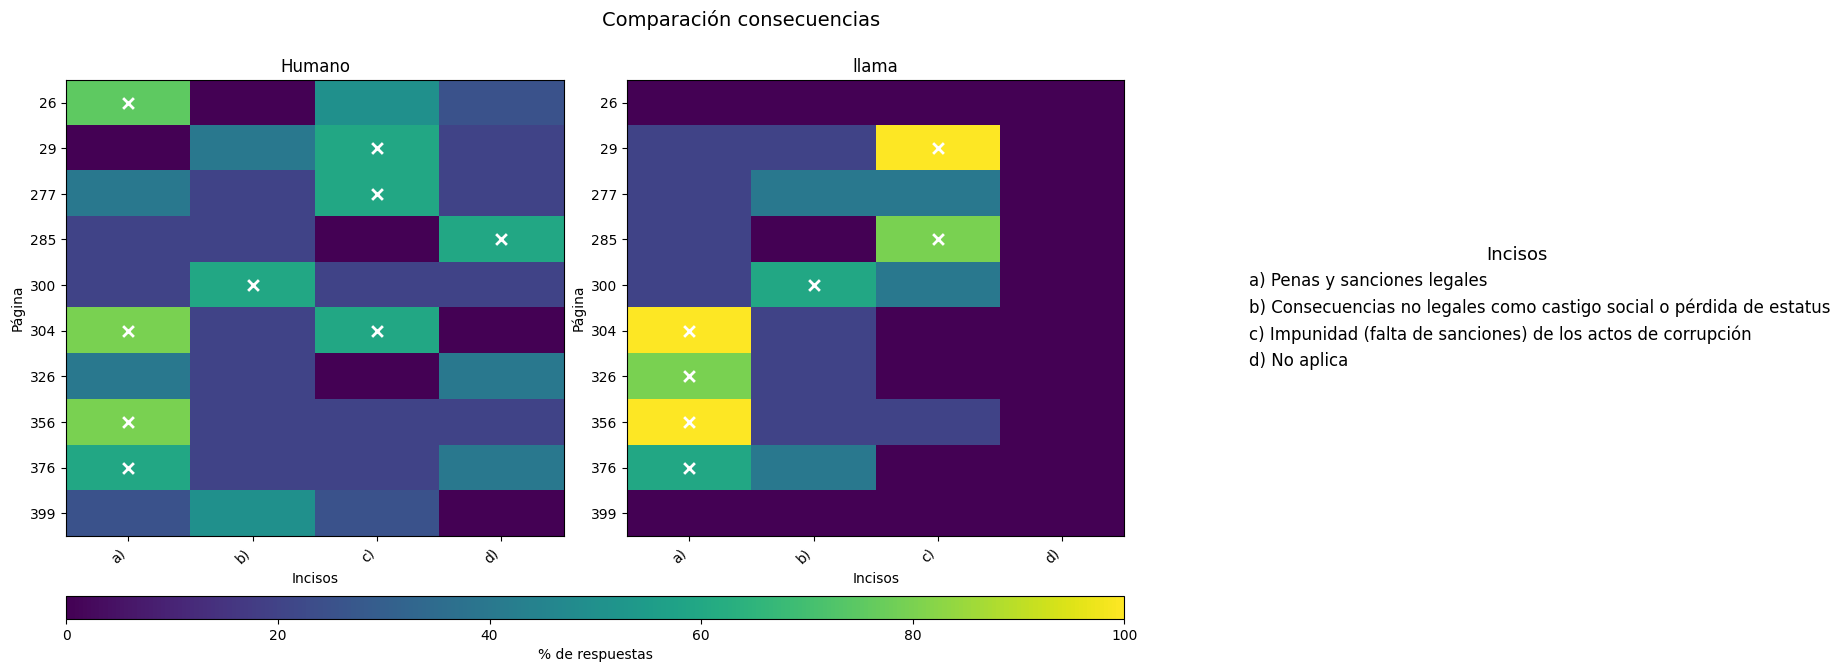

Precisión para que_muestra: 0.20


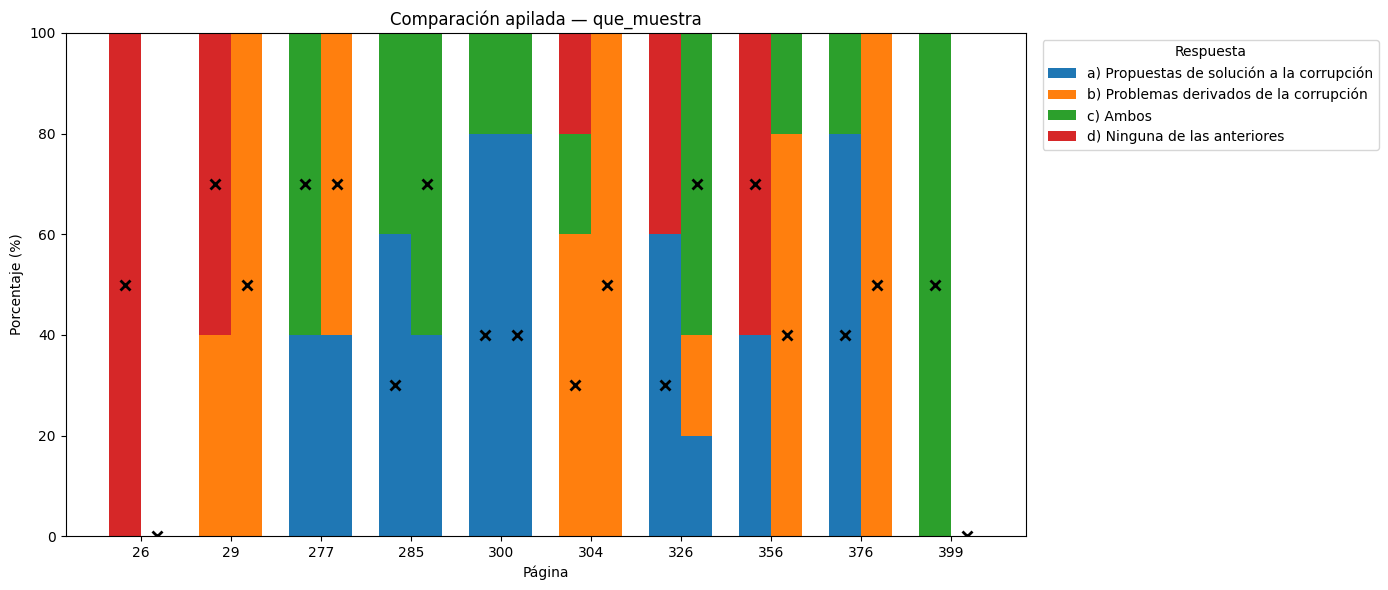

[intencion] Jaccard medio = 0.383


/tmp/ipykernel_7559/550774659.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


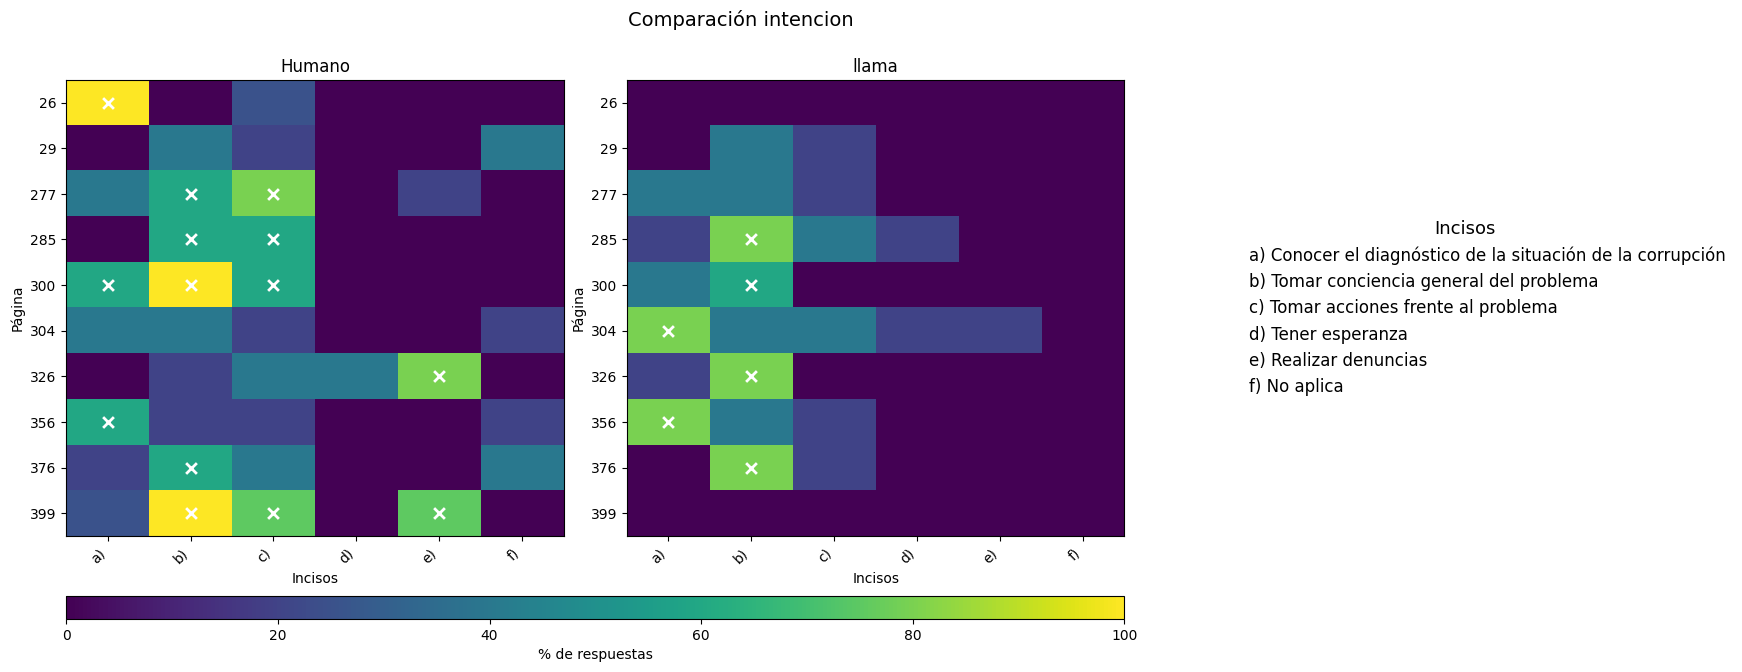

[localizacion_problema] Jaccard medio = 0.400


/tmp/ipykernel_7559/550774659.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


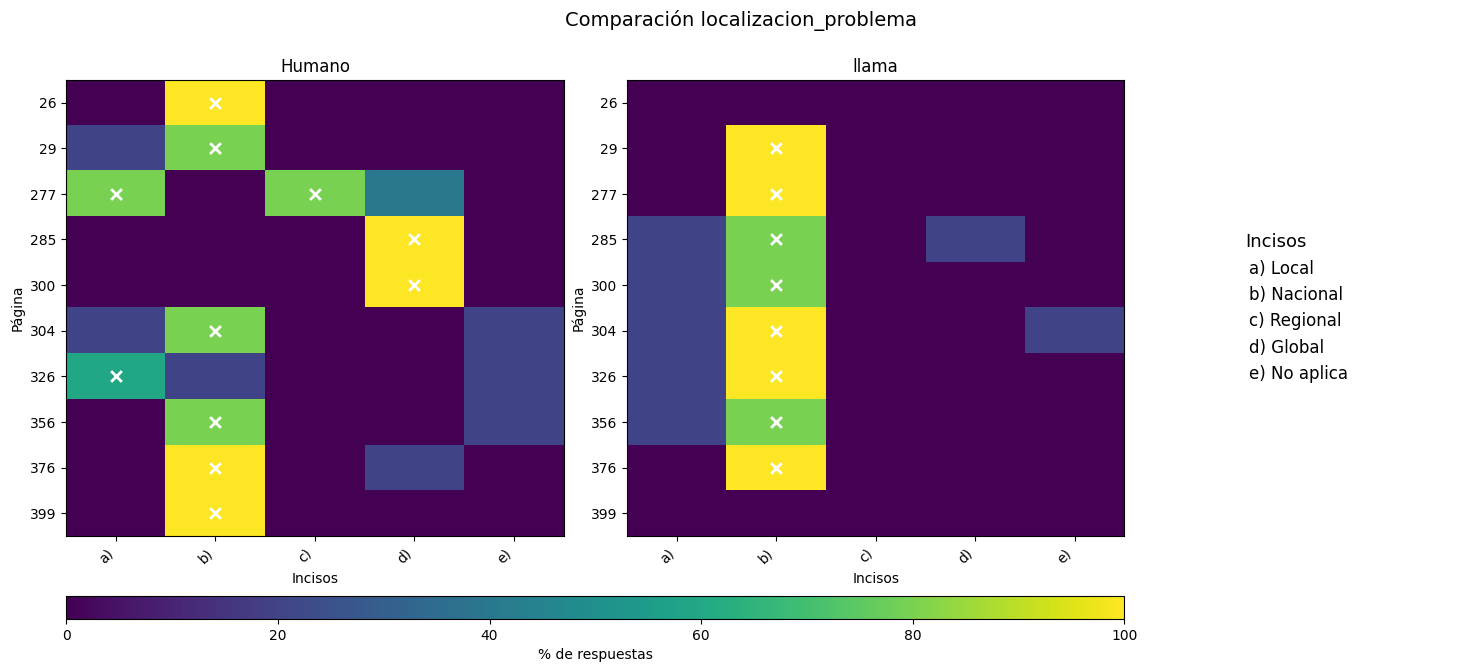

[involucrados] Jaccard medio = 0.250


/tmp/ipykernel_7559/550774659.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


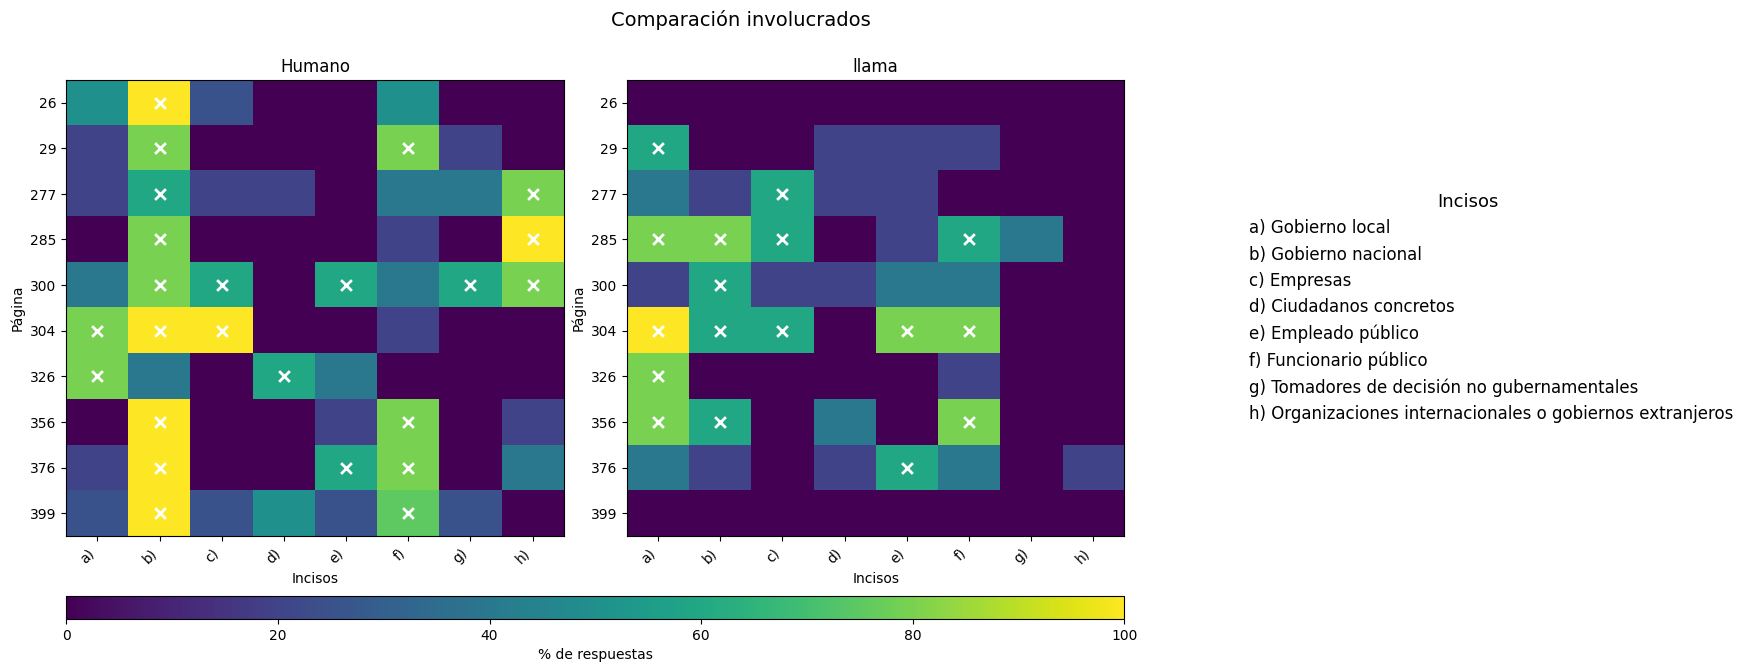

Precisión para formalidad: 0.60


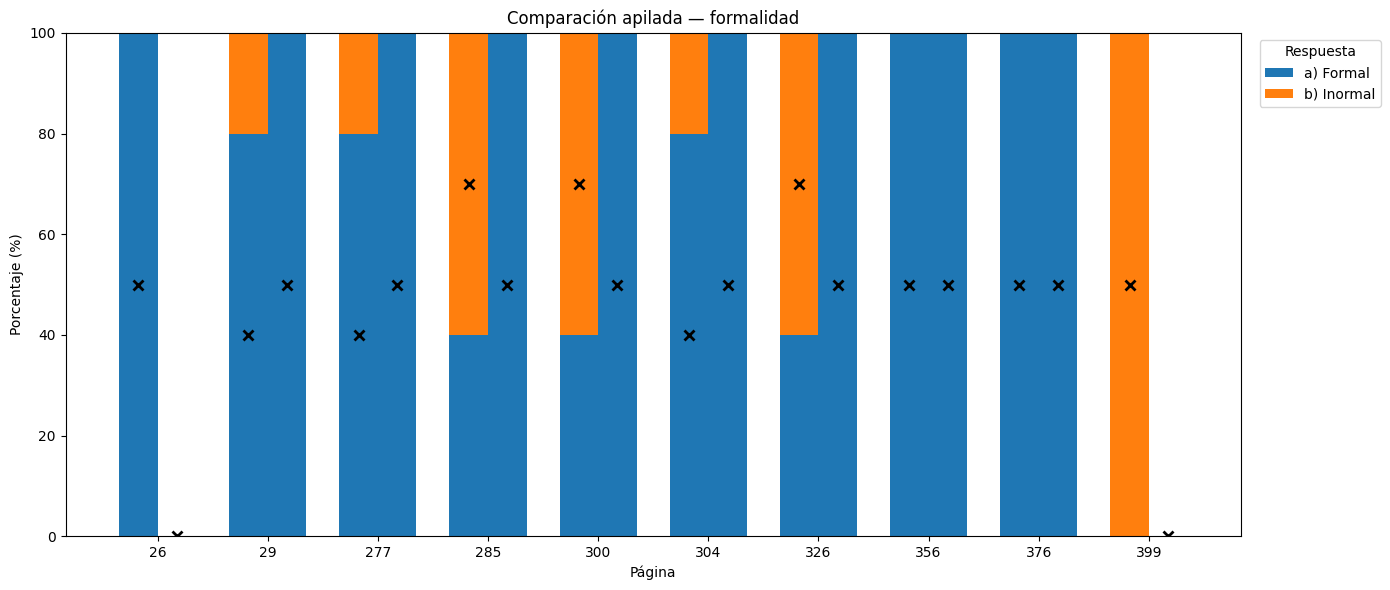

Precisión para nivel_educacion: 0.10


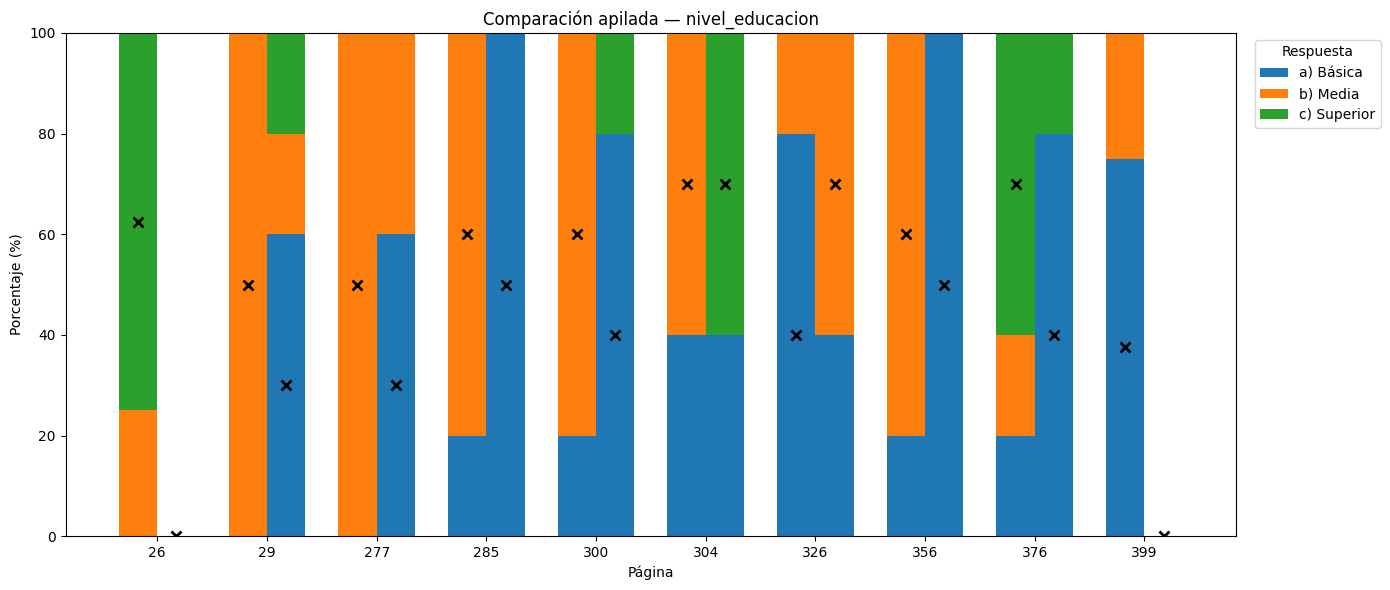

Precisión para tono: 0.80


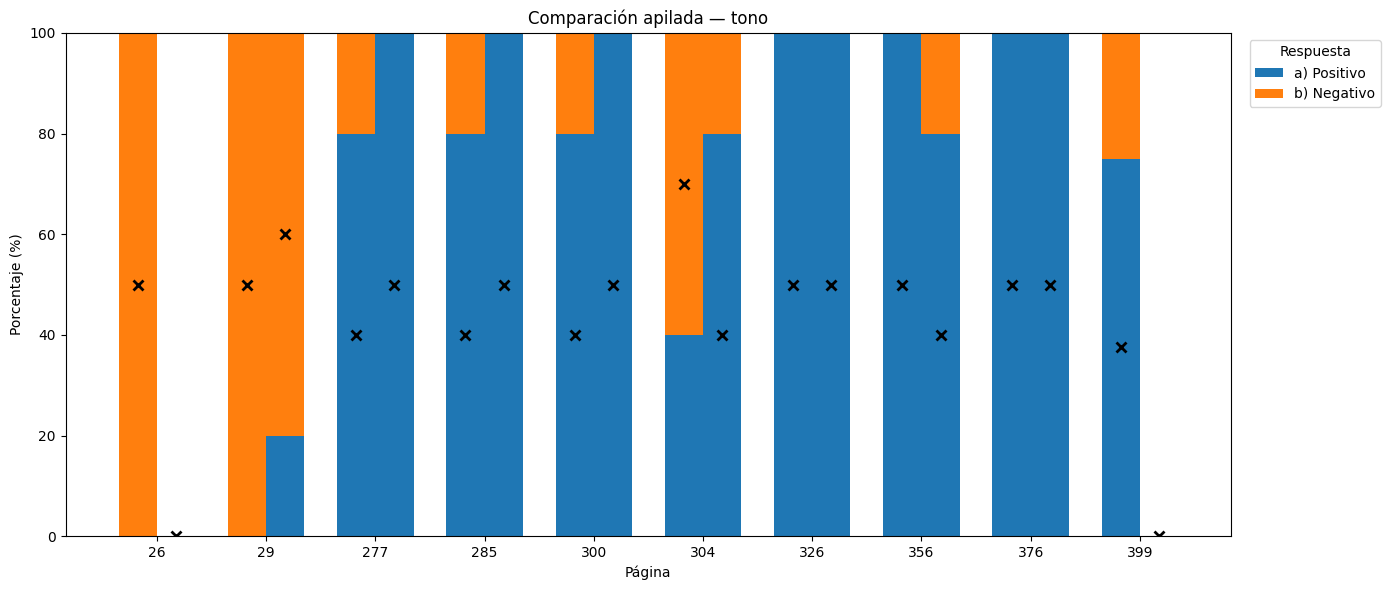

[emociones] Jaccard medio = 0.250


/tmp/ipykernel_7559/550774659.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


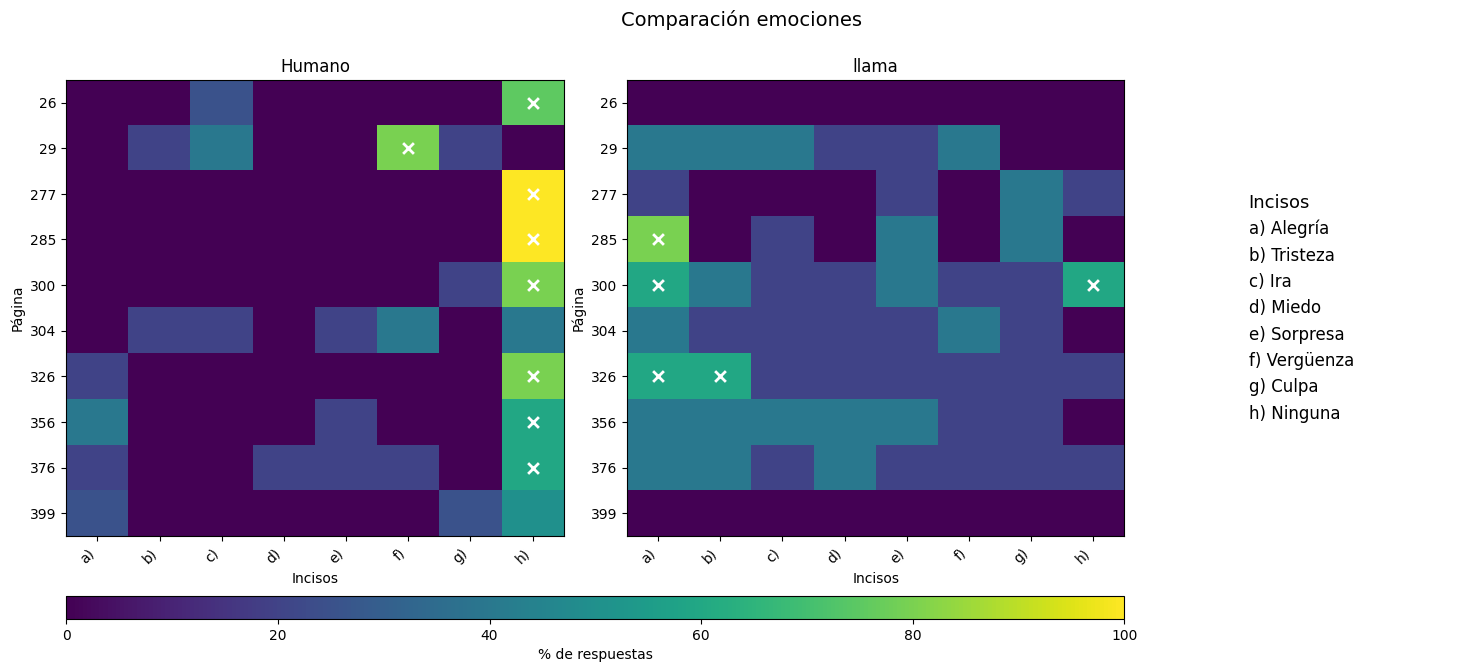

Porcentajes medios de consenso por página:
        humano  llama  igual
pagina                      
26       87.50   0.00   0.00
29       75.71  78.57   0.57
277      82.86  71.43   0.36
285      81.43  81.43   0.29
300      78.57  78.57   0.50
304      68.57  87.14   0.57
326      74.29  77.14   0.43
356      80.00  81.43   0.64
376      82.86  85.71   0.64
399      87.50   0.00   0.00
Precisión media (respuestas únicas): 0.529
Jaccard medio (respuestas únicas): 0.388


In [26]:
from sklearn.metrics import accuracy_score

porcentaje_concenso = 60

orden = {}
orden_paginas = sorted(paginas)

preguntas = df_humano.columns[1:]
orden_cols = ['pagina', 'tipo_entidad', 'origen_entidad', 'proposito',
              'informacion_presentada', 'vision', 'consecuencias', 'que_muestra',
              'intencion', 'localizacion_problema', 'involucrados', 'formalidad',
              'nivel_educacion', 'tono', 'emociones'
              ]
multi_answer = ["proposito", "informacion_presentada", "consecuencias", "intencion", "localizacion_problema", "involucrados", "emociones"]
incisos_posibles = {"proposito": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)'],
                    "informacion_presentada": ['a)', 'b)', 'c)'],
                    "consecuencias": ['a)', 'b)', 'c)', 'd)'],
                    "intencion": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)'],
                    "localizacion_problema": ['a)', 'b)', 'c)', 'd)', 'e)'],
                    "involucrados": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)'],
                    "emociones": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']
                    }

#out = Path("./graficas")
#out.mkdir(exist_ok=True)

# Paleta de colores global
inc = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)", "i)"]
colores = plt.cm.tab10.colors  # o 'tab20', 'Set3', etc.
color_map = {c: colores[i % len(colores)] for i, c in enumerate(inc)}

accuracies = []
jaccards = []

df_consensos = []

for p in preguntas:
    if p not in multi_answer:
        tabla_humano = calcular_porcentajes(df_humano, p, orden_paginas).reindex(orden_paginas)
        tabla_llama = calcular_porcentajes(df_llama, p, orden_paginas).reindex(orden_paginas)

        consenso_humano = tabla_humano.max(axis=1).rename("humano")
        consenso_llama = tabla_llama.max(axis=1).rename("llama")
        mayor_humano = tabla_humano.idxmax(axis=1)
        mayor_llama = tabla_llama.idxmax(axis=1)

        df_consenso_p = pd.concat([consenso_humano, consenso_llama], axis=1)
        df_consenso_p['pregunta'] = p
        df_consenso_p['pagina'] = df_consenso_p.index
        df_consenso_p['igual'] = ((mayor_humano == mayor_llama) & (consenso_humano > 0) & (consenso_llama > 0))
        df_consensos.append(df_consenso_p)

        valid = (tabla_humano.sum(axis=1) > 0) | (tabla_llama.sum(axis=1) > 0)
        tf = tabla_humano[valid].fillna(0)
        tl = tabla_llama[valid].fillna(0)

        mayor_humano = tf.idxmax(axis=1)
        mayor_llama = tl.idxmax(axis=1)
        mf_emp = tf.apply(lambda r: set(r.index[r.eq(r.max())]), axis=1)
        ml = tl.idxmax(axis=1)  

        tabla_humano["origen"] = "Humano"
        tabla_llama["origen"] = "llama"

        acc = np.mean([ml.loc[i] in mf_emp.loc[i] for i in mf_emp.index])
        accuracies.append(acc)
        print(f"Precisión para {p}: {acc:.2f}")

        df_long = pd.concat([tabla_humano, tabla_llama]).reset_index(names="pagina")
        df_long = df_long.melt(id_vars=["pagina","origen"], var_name="respuesta", value_name="porcentaje")

        pivot = df_long.pivot_table(index=["pagina","origen"], 
                                    columns="respuesta", values="porcentaje", fill_value=0)

        fig, ax = plt.subplots(figsize=(14,6))

        bar_width = 0.35
        xpos = np.arange(len(orden_paginas))
        xlabels = [str(x) for x in orden_paginas]

        cols = [c for c in inc if c in pivot.columns]  # incisos: ['a)','b)',...]
        #colores = plt.rcParams['axes.prop_cycle'].by_key()['color']
        #color_map = {c: colores[i % len(colores)] for i, c in enumerate(cols)}
        etiquetas_largas = {c: incisos_dicts[p].get(c, c) for c in cols}

        for j, origen in enumerate(["Humano","llama"]):
            bottom = np.zeros(len(orden_paginas))
            vals_df = pivot.xs(origen, level="origen")[cols].reindex(orden_paginas, fill_value=0)
            vals_mat = vals_df.to_numpy()
            max_vals = vals_mat.argmax(axis=1)
            for k, col in enumerate(cols):
                vals = vals_df[col].values
                ax.bar(
                    xpos + (j-0.5)*bar_width, vals, bar_width,
                    bottom=bottom,
                    color=color_map[col],
                    label=etiquetas_largas[col] if j==0 else "_nolegend_"
                )
                for i_pag, v in enumerate(vals):
                    #if v >= porcentaje_concenso:
                    if max_vals[i_pag] == k:
                        xc = xpos[i_pag] + (j-0.5)*bar_width
                        yc = bottom[i_pag] + v / 2
                        ax.plot(xc, yc, marker='x', markersize=7, color='k', mew=2)
                bottom += vals

        ax.set_xticks(xpos)
        ax.set_xticklabels(xlabels, rotation=0)
        ax.set_ylabel("Porcentaje (%)")
        ax.set_xlabel("Página")
        ax.set_title(f"Comparación apilada — {p}")
        ax.set_ylim(0, 100)  # misma escala

        ax.legend(title="Respuesta", bbox_to_anchor=(1.01, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

    else:
        # ========= MULTI-RESPUESTA (heatmaps) =========
        posibles_list = incisos_posibles[p]
        porcentajes_humano = calcular_porcentajes(df_humano, p, orden_paginas, posibles_list)
        porcentajes_llama = calcular_porcentajes(df_llama, p, orden_paginas, posibles_list)

        consenso_humano = porcentajes_humano.max(axis=1).rename("humano")
        consenso_llama = porcentajes_llama.max(axis=1).rename("llama")
        mayor_humano = porcentajes_humano.idxmax(axis=1)
        mayor_llama = porcentajes_llama.idxmax(axis=1)

        df_consenso_p = pd.concat([consenso_humano, consenso_llama], axis=1)
        df_consenso_p['pregunta'] = p
        df_consenso_p['pagina'] = df_consenso_p.index
        df_consenso_p['igual'] = ((mayor_humano == mayor_llama) & (consenso_humano > 0) & (consenso_llama > 0))
        df_consensos.append(df_consenso_p)

        act_humano  = conjuntos_activos(porcentajes_humano, porcentaje_concenso)
        act_llama  = conjuntos_activos(porcentajes_llama, porcentaje_concenso)
        jac_series = jaccard(act_humano, act_llama, orden_paginas)
        print(f"[{p}] Jaccard medio = {jac_series.mean():.3f}")
        jaccards.append(jac_series.mean())

        fig = plt.figure(figsize=(18, 7))

        gs = gridspec.GridSpec(
            2, 3,
            width_ratios=[1, 1, 0.55],     # ajusta 0.55 según lo largo de tus textos
            height_ratios=[20, 1],
            wspace=0.15, hspace=0.25
        )

        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax_leg = fig.add_subplot(gs[0, 2])  # eje exclusivo para la leyenda
        cax = fig.add_subplot(gs[1, 0:2])   # colorbar ocupa las 2 primeras columnas

        im1 = ax1.imshow(porcentajes_humano.values, aspect='auto', vmin=0, vmax=100, cmap="viridis")
        im2 = ax2.imshow(porcentajes_llama.values, aspect='auto', vmin=0, vmax=100, cmap="viridis")

        mask = porcentajes_humano.values >= porcentaje_concenso
        ys, xs = np.where(mask)
        ax1.scatter(xs, ys, s=60, c='w', marker='x', linewidths=2)

        mask = porcentajes_llama.values >= porcentaje_concenso
        ys, xs = np.where(mask)
        ax2.scatter(xs, ys, s=60, c='w', marker='x', linewidths=2)

        for ax, data, title in zip([ax1, ax2],
                                [porcentajes_humano, porcentajes_llama],
                                ["Humano", "llama"]):
            ax.set_xticks(np.arange(data.shape[1]))
            ax.set_xticklabels(posibles_list, rotation=45, ha='right')
            ax.set_yticks(np.arange(data.shape[0])); ax.set_yticklabels(orden_paginas)
            ax.set_xlabel("Incisos"); ax.set_ylabel("Página")
            ax.set_title(title); ax.set_ylim(data.shape[0]-0.5, -0.5)

        cb = fig.colorbar(im1, cax=cax, orientation="horizontal")
        cb.set_label("% de respuestas")

        from matplotlib.patches import Patch
        long_labels = [incisos_dicts[p].get(k, k) for k in posibles_list]
        dummy = [Patch(facecolor='none', edgecolor='none') for _ in long_labels]

        ax_leg.axis('off')
        ax_leg.legend(
            dummy, long_labels,
            title="Incisos",
            loc="center left", bbox_to_anchor=(0.0, 0.5),
            frameon=False, fontsize=12, title_fontsize=13
        )

        fig.suptitle(f"Comparación {p}", y=0.98, fontsize=14)
        plt.tight_layout()
        plt.show()
df_consensos = pd.concat(df_consensos, ignore_index=True)
promedios = df_consensos.groupby('pagina')[['humano', 'llama', 'igual']].mean().round(2)

print(f"Porcentajes medios de consenso por página:")
print(promedios)
print(f"Precisión media (respuestas únicas): {np.mean(accuracies):.3f}")
print(f"Jaccard medio (respuestas únicas): {np.mean(jaccards):.3f}")

In [36]:
df_consensos.groupby('pagina')[['humano', 'llama', 'igual']].mean().round(2).sort_values(by='igual')

,humano,llama,igual
pagina,,,
26,87.50,0.00,0.00
399,87.50,0.00,0.00
285,81.43,81.43,0.29
277,82.86,71.43,0.36
326,74.29,77.14,0.43
300,78.57,78.57,0.50
29,75.71,78.57,0.57
304,68.57,87.14,0.57
356,80.00,81.43,0.64


In [33]:
no_tomar = [26,399,285,376]
df_reducido = df_consensos.where(~df_consensos['pagina'].isin(no_tomar))
df_reducido

,humano,llama,pregunta,pagina,igual
0,NaN,NaN,NaN,NaN,NaN
1,80.0,100.0,tipo_entidad,29.0,True
2,100.0,80.0,tipo_entidad,277.0,True
3,NaN,NaN,NaN,NaN,NaN
4,80.0,40.0,tipo_entidad,300.0,True
...,...,...,...,...,...
135,40.0,40.0,emociones,304.0,False
136,80.0,60.0,emociones,326.0,False
137,60.0,40.0,emociones,356.0,False
138,NaN,NaN,NaN,NaN,NaN


In [34]:
df_sorted_page = df_consensos.groupby('pagina')[['humano', 'llama', 'igual']].mean().round(2).sort_values(by='igual')
idx_min = df_sorted_page.head(2).index
idx_max = df_sorted_page.tail(1).index

idx_drop = idx_min.union(idx_max)
print("\nPromedio global")
print(df_sorted_page.mean(axis=0))
print("\nPromedio sin extremos")
print(df_sorted_page.drop(index=idx_drop, inplace=False).mean(axis=0))

df_reducido.groupby('pregunta')[['humano', 'llama', 'igual']].mean().round(2).sort_values(by='igual')


Promedio global
humano    79.929
llama     64.142
igual      0.400
dtype: float64

Promedio sin extremos
humano    77.347143
llama     79.387143
igual      0.480000
dtype: float64


,humano,llama,igual
pregunta,,,
emociones,73.33,46.67,0.0
nivel_educacion,83.33,70.00,0.0
involucrados,86.67,73.33,0.333333
proposito,73.33,60.00,0.333333
que_muestra,63.33,80.00,0.333333
localizacion_problema,80.00,93.33,0.5
origen_entidad,73.33,90.00,0.5
formalidad,76.67,100.00,0.666667
informacion_presentada,93.33,100.00,0.666667


# Promedio de acuerdo por pregunta

In [30]:
df_consensos.groupby('pregunta')[['humano', 'llama', 'igual']].mean().round(2).sort_values(by='igual')

,humano,llama,igual
pregunta,,,
emociones,72.5,40.0,0.0
nivel_educacion,79.0,60.0,0.0
involucrados,92.0,58.0,0.2
proposito,75.0,50.0,0.2
que_muestra,72.0,64.0,0.2
localizacion_problema,88.0,74.0,0.4
origen_entidad,75.0,70.0,0.4
formalidad,82.0,80.0,0.5
consecuencias,62.5,62.0,0.6


/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


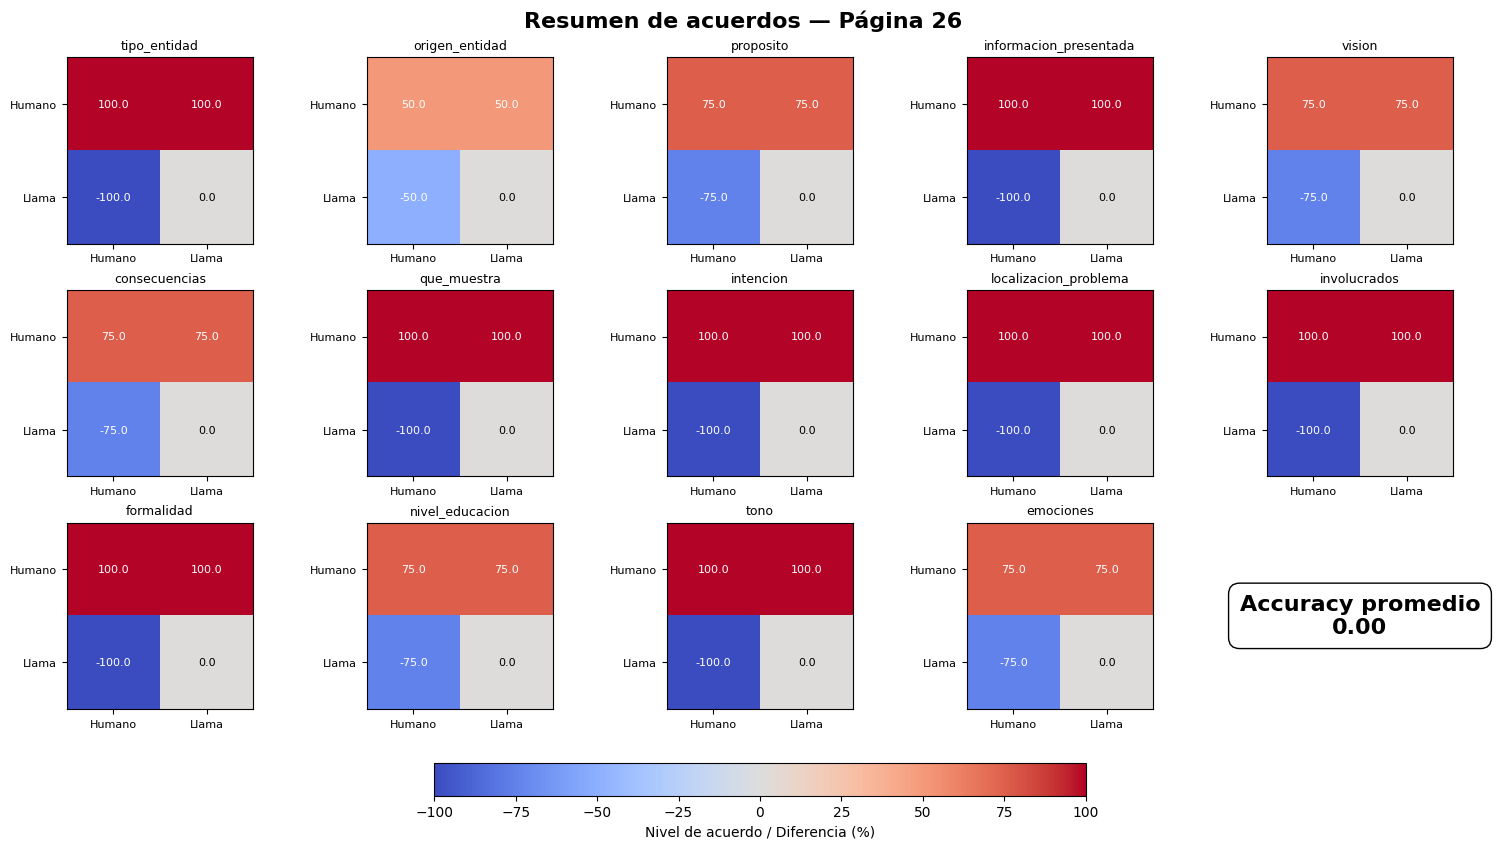

/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


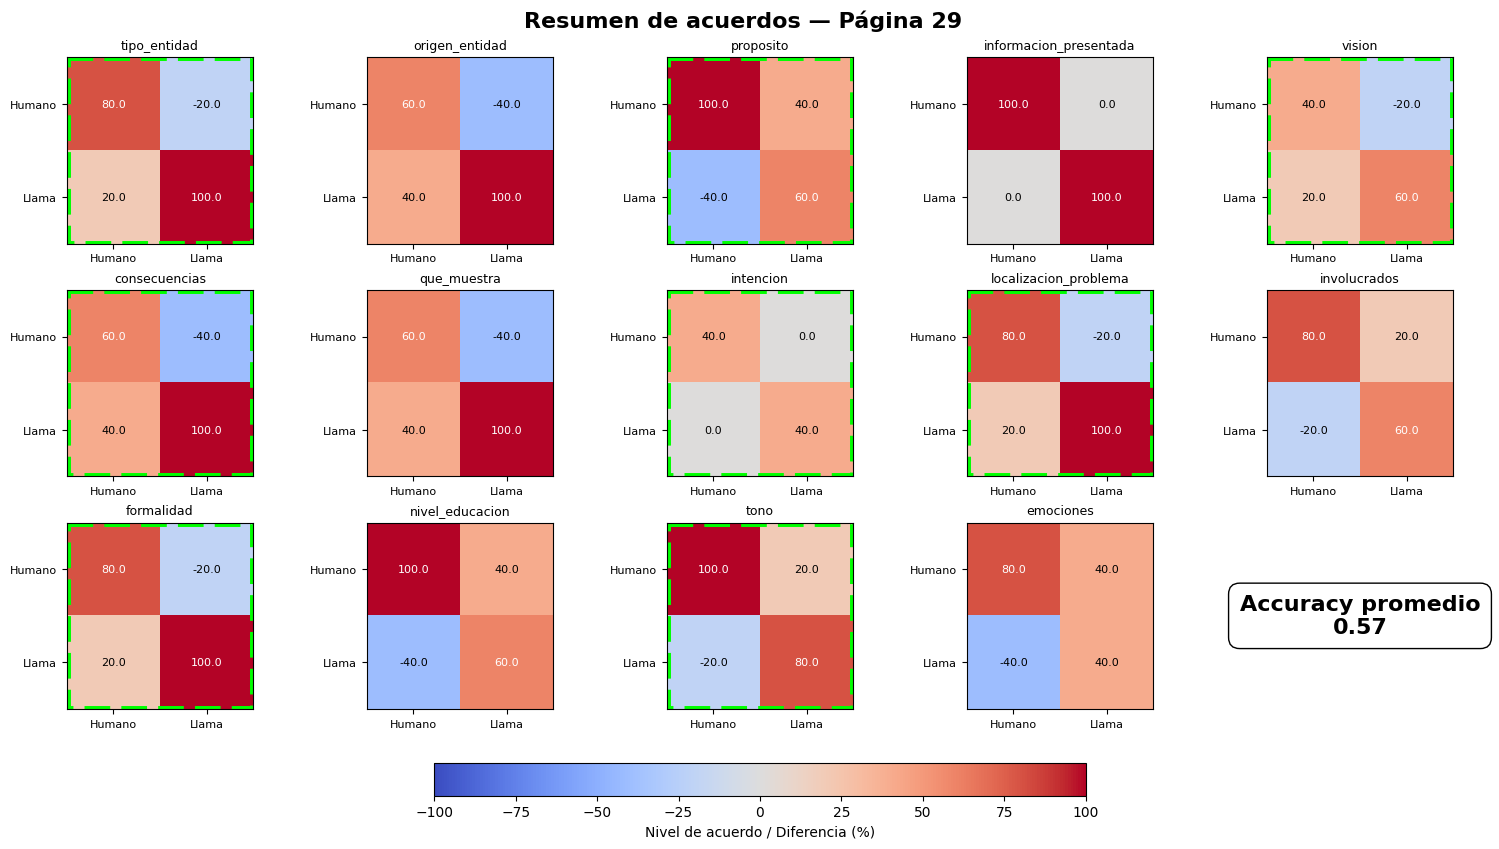

/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


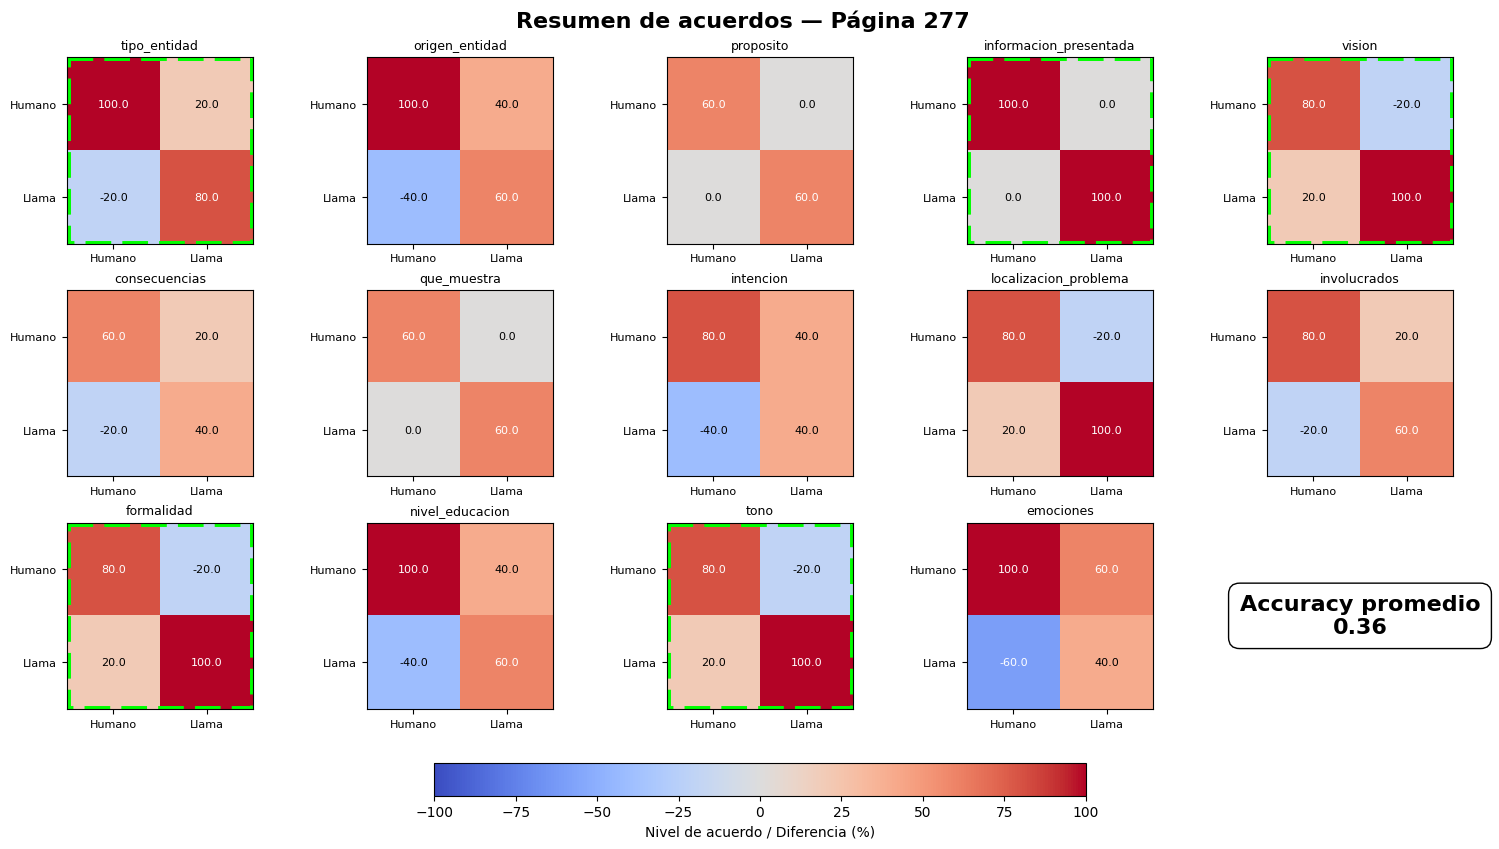

/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


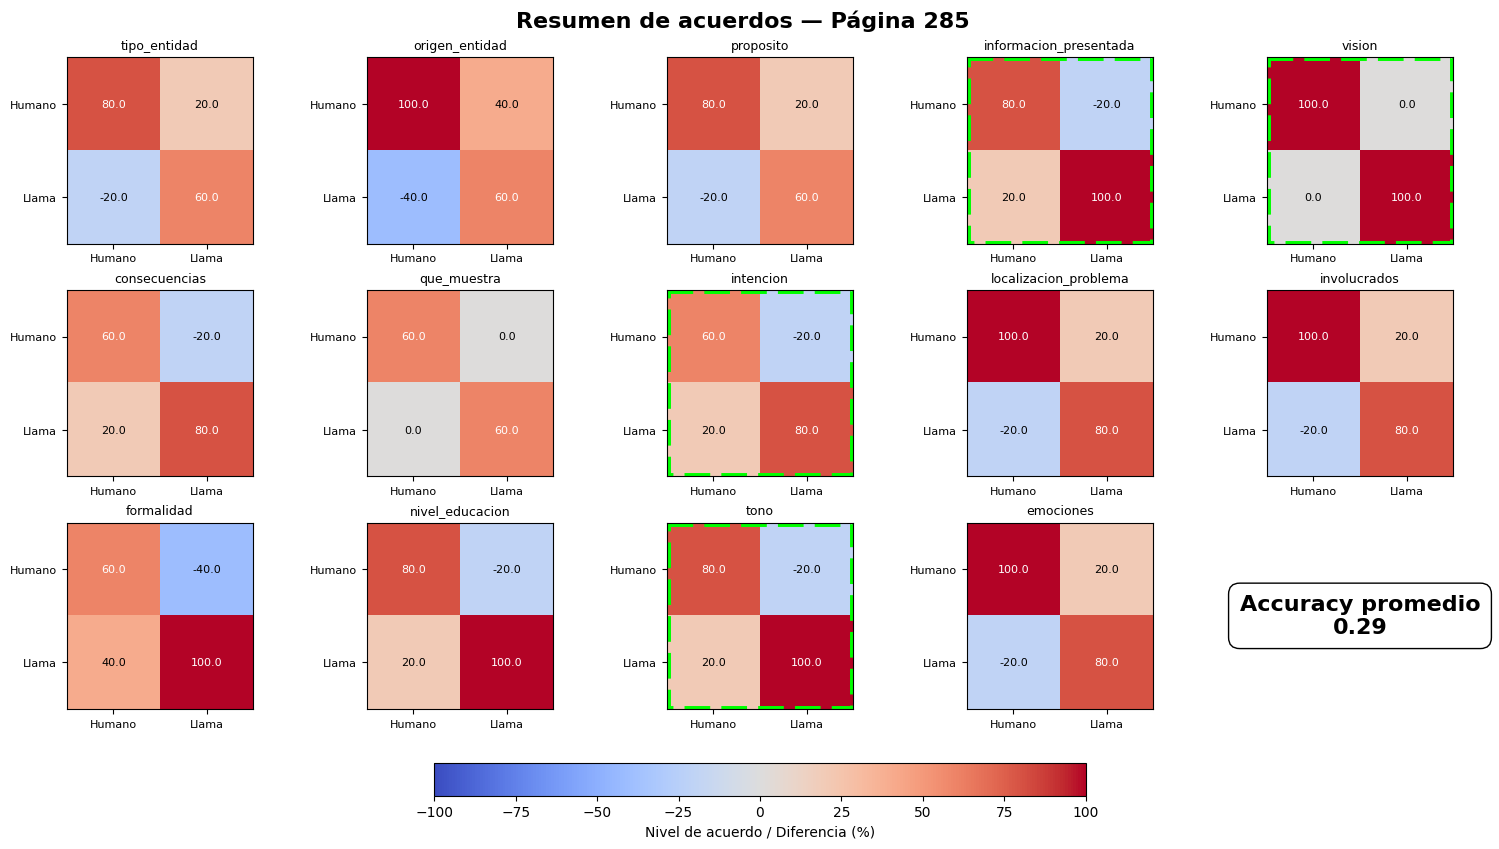

/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


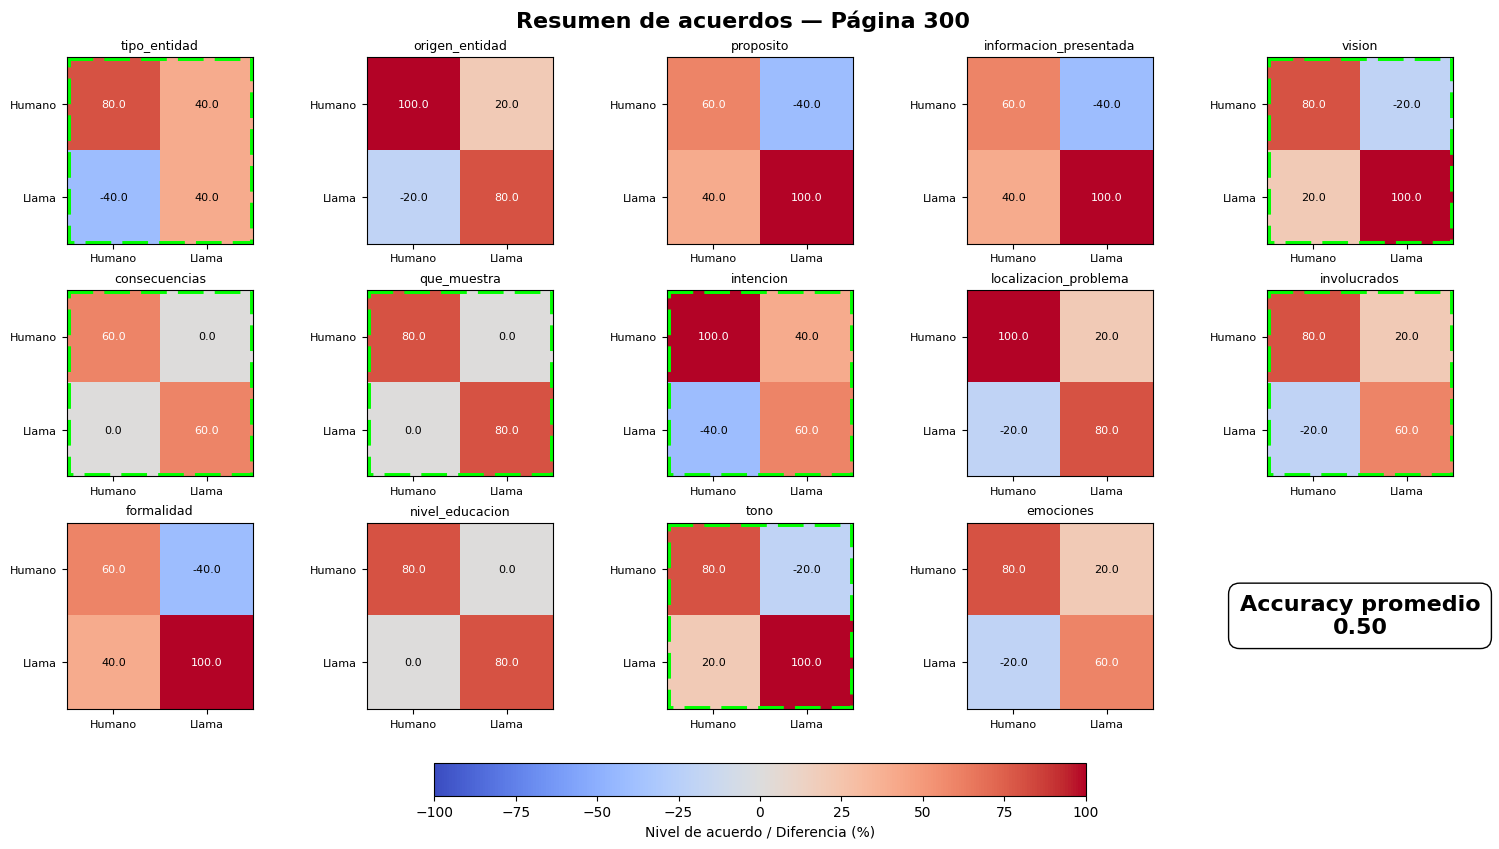

/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


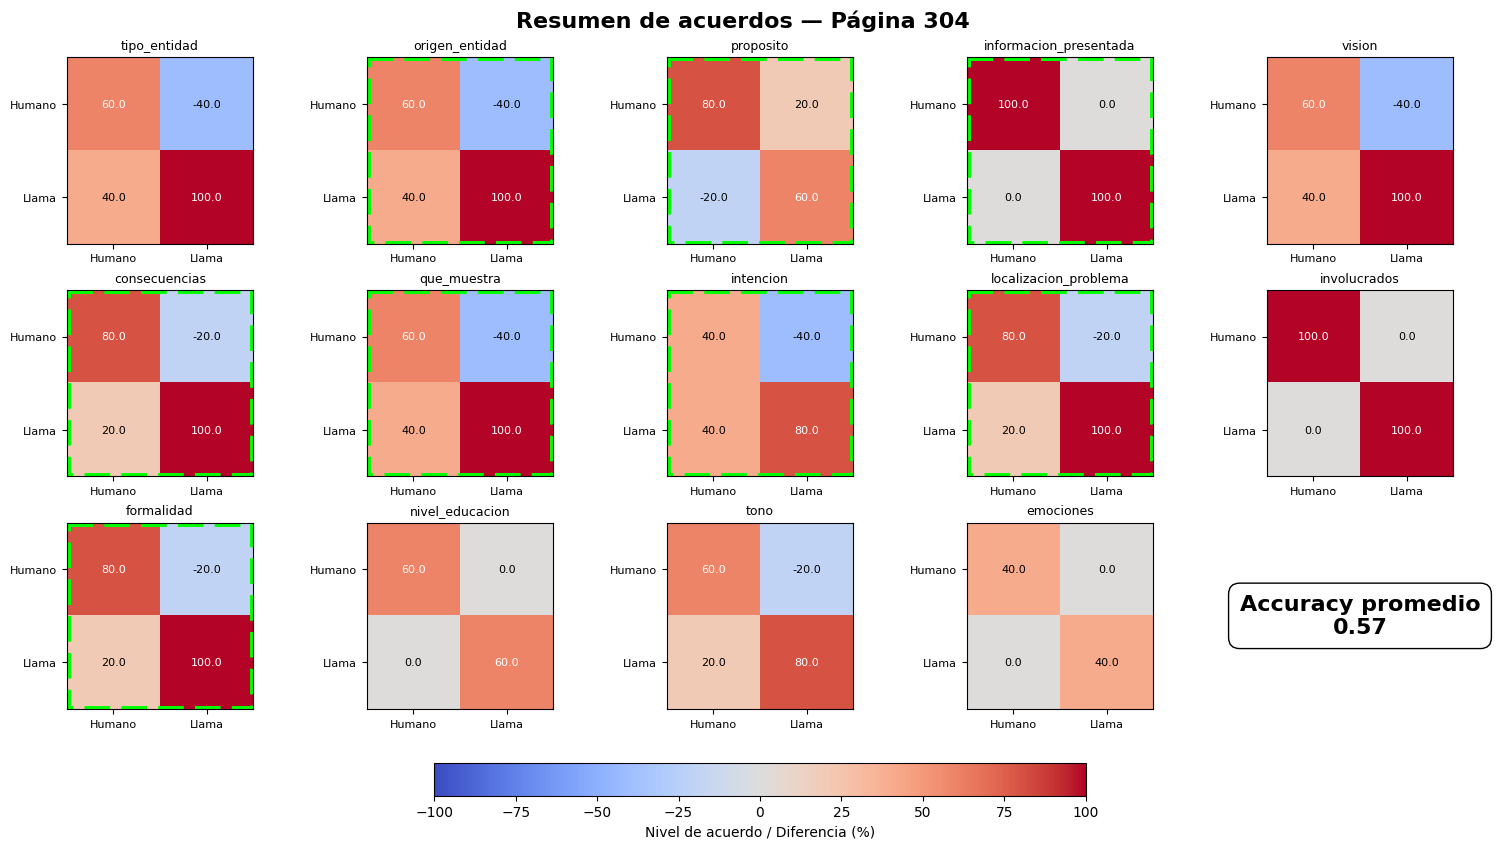

/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


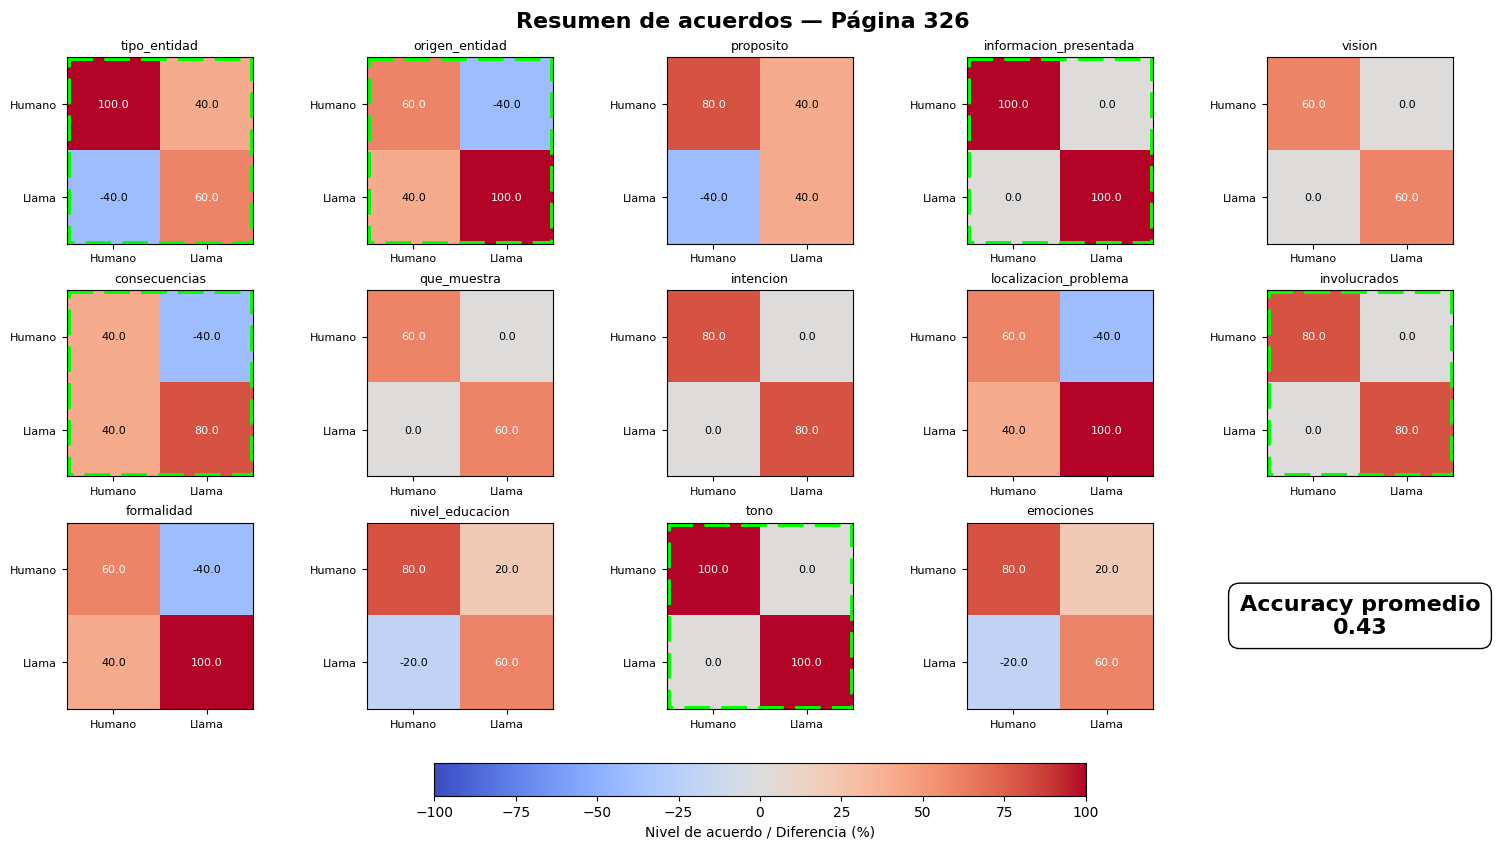

/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


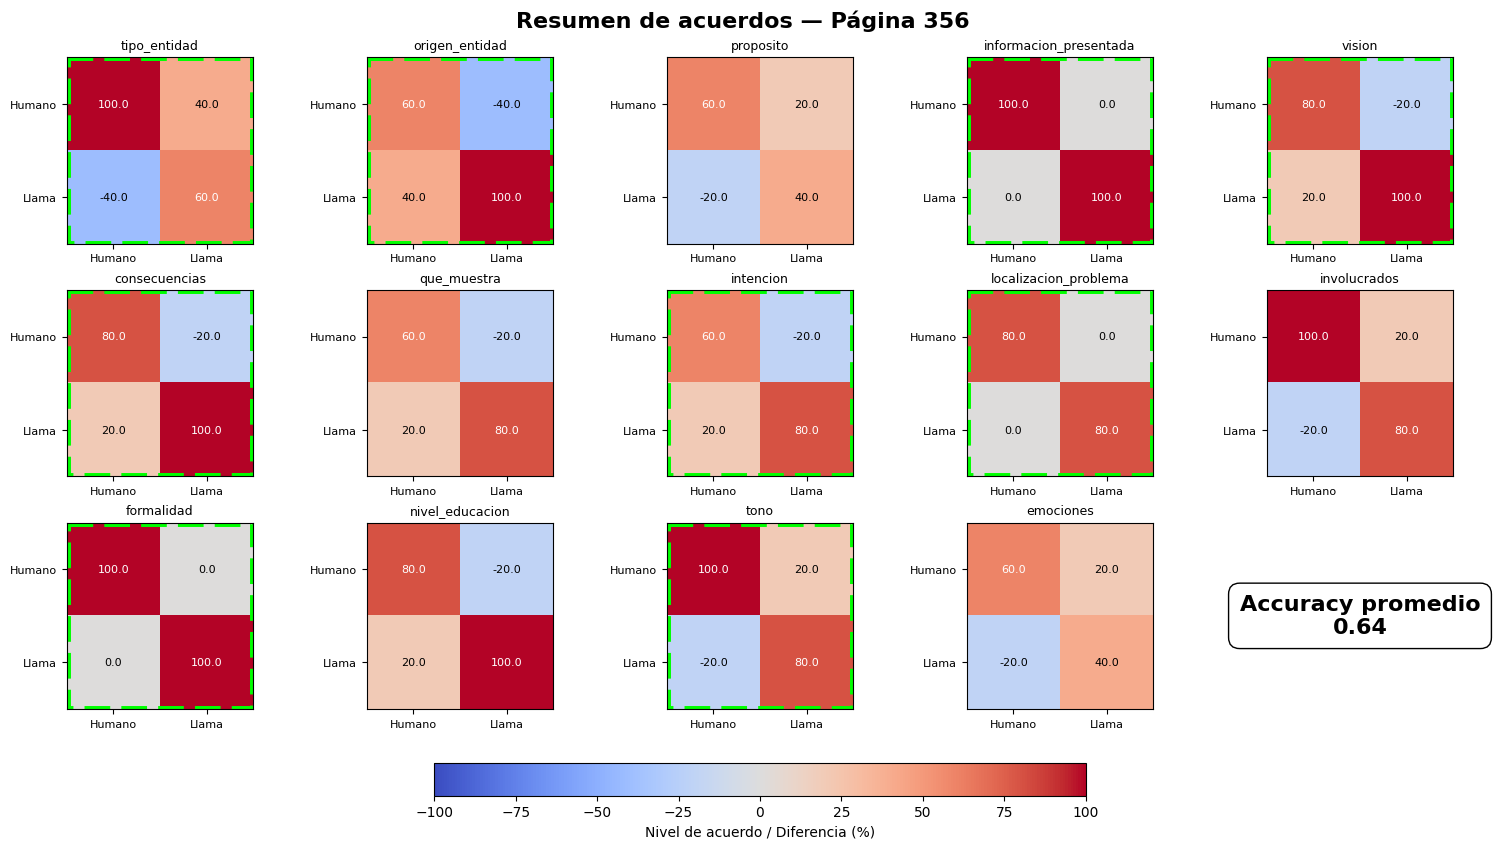

/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


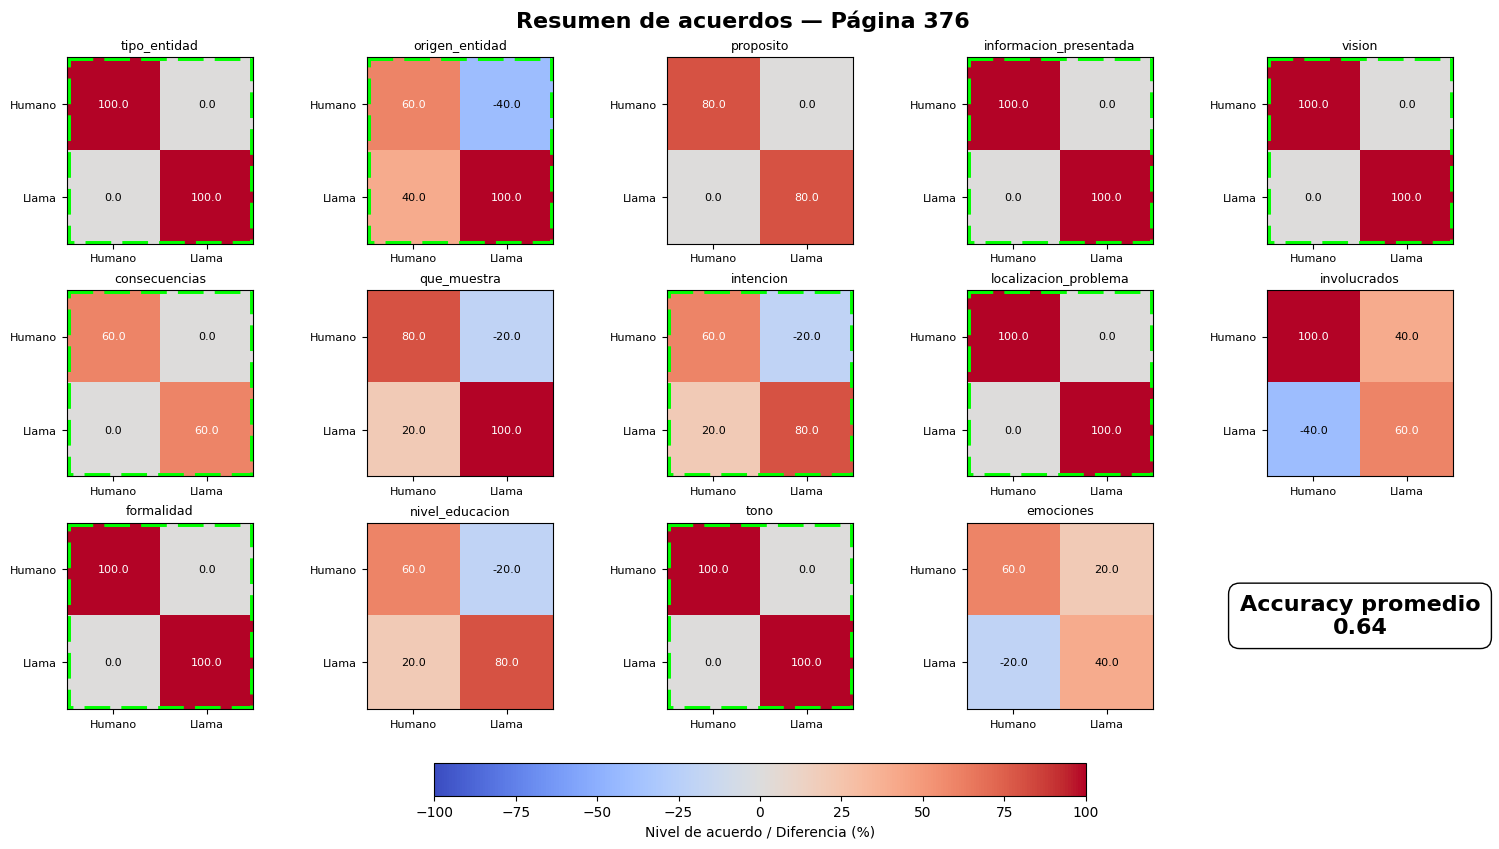

/tmp/ipykernel_7559/318737292.py:111: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


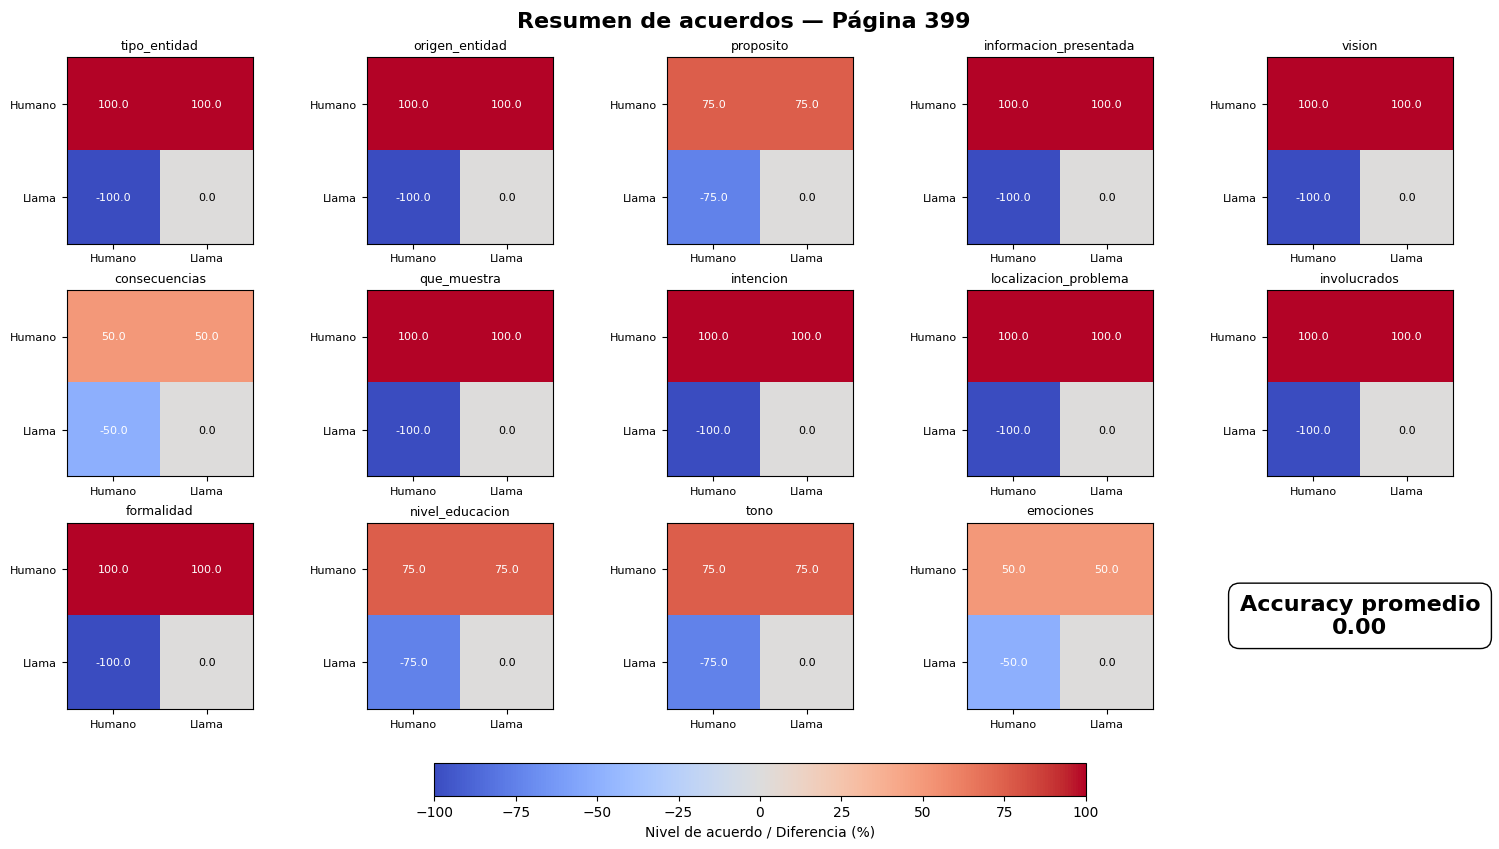

In [31]:
pags = sorted(df_consensos['pagina'].unique())
n_preg = len(preguntas)

# parámetros visuales
plt.rcParams.update({"font.size": 10})
vmax = 100
vmin = -100   # diferencias pueden ser negativas

for pag in pags:

    # sub-dataframe para esta página
    sub = df_consensos[df_consensos["pagina"] == pag].set_index("pregunta")

    # crear figura: decides tú cuántas filas/columnas usar
    ncols = 5
    nrows = int(np.ceil(n_preg / ncols))

    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(3*ncols, 2.8*nrows),
        constrained_layout=True
    )

    # aplanar para recorrer fácilmente
    axes = axes.flatten()

    for i, p in enumerate(preguntas):
        ax = axes[i]

        if p not in sub.index:
            ax.axis("off")
            continue

        fila = sub.loc[p]

        # extraer valores
        f = float(fila["humano"])
        l = float(fila["llama"])
        igual = bool(fila["igual"])

        # construir la matriz 2×2
        mat = np.zeros((2, 2))
        mat[0, 0] = f        # acuerdo interno humano
        mat[1, 1] = l        # acuerdo interno llama
        mat[0, 1] = f - l    # diferencia humano − llama
        mat[1, 0] = l - f    # diferencia llama − humano

        # dibujar mini-heatmap
        im = ax.imshow(mat, cmap="coolwarm", vmin=vmin, vmax=vmax)

        # etiquetas de ejes (solo 2×2)
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(["Humano", "Llama"], fontsize=8)
        ax.set_yticklabels(["Humano", "Llama"], fontsize=8)

        # título con el nombre de la pregunta
        ax.set_title(p, fontsize=9)

        # texto con valor dentro de cada celda
        for r in range(2):
            for c in range(2):
                val = mat[r, c]
                ax.text(
                    c, r, f"{val:.1f}",
                    ha="center", va="center",
                    fontsize=8,
                    color="white" if abs(val) > 40 else "black"
                )

        # marcar si coinciden
        if igual:
            # Añadir borde punteado alrededor del heatmap 2x2
            rect = Rectangle(
                (-0.5, -0.5),   # esquina inferior izquierda
                2, 2,           # ancho, alto
                fill=False,
                edgecolor="lime",
                linewidth=5,
                linestyle="--"
            )
            ax.add_patch(rect)

    # desactivar ejes extra si sobran
    for j in range(i+1, len(axes)-1):
        axes[j].axis("off")

    # la última celda se usa para texto
    ax_info = axes[-1]
    ax_info.axis("off")

    acc_page = sub["igual"].mean()

    ax_info.text(
        0.5, 0.5,
        f"Accuracy promedio\n{acc_page:.2f}",
        ha="center", va="center",
        fontsize=16, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black")
    )

    # agregar barra de color global
    cbar = fig.colorbar(
            im, ax=axes, 
            orientation="horizontal",
            fraction=0.05, pad=0.05
        )
    cbar.set_label("Nivel de acuerdo / Diferencia (%)")

    fig.subplots_adjust(bottom=0.12)

    # título general
    fig.suptitle(f"Resumen de acuerdos — Página {pag}", fontsize=16, fontweight="bold")

    plt.show()

/tmp/ipykernel_7559/3988802181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metrics_melt, x="Métrica", y="Valor", palette="Set2", width=0.5)


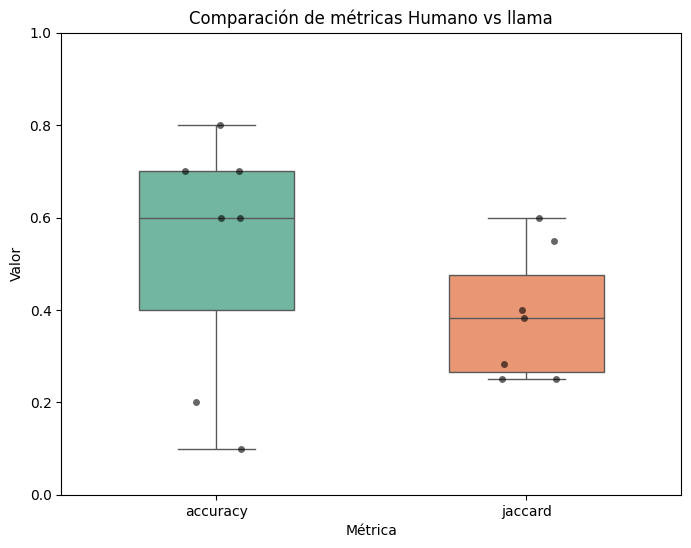

In [32]:
metrics = pd.DataFrame({
    'accuracy': accuracies,
    'jaccard': jaccards
})

metrics_melt = metrics.melt(var_name='Métrica', value_name='Valor')

plt.figure(figsize=(8,6))
sns.boxplot(data=metrics_melt, x="Métrica", y="Valor", palette="Set2", width=0.5)
sns.stripplot(data=metrics_melt, x="Métrica", y="Valor", color="black", size=5, alpha=0.6)
plt.title("Comparación de métricas Humano vs llama")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.show()